## **__INJURY RISK PREDICTION__**

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### **__DATA UNDERSTANDING__**

In [3]:
df = pd.read_csv("../data/High_Accuracy_Sport_Injury_Dataset.csv")

In [4]:
df.head()

,Age,Gender,Height_cm,Weight_kg,BMI,Training_Frequency,Training_Duration,Warmup_Time,Sleep_Hours,Flexibility_Score,Muscle_Asymmetry,Recovery_Time,Injury_History,Stress_Level,Training_Intensity,Injury_Risk
0,36,0,155.4,56.3,23.34,1,94,20,7.2,63.3,3.7,63,1,8,4.4,0
1,30,0,167.6,45.3,16.12,4,114,5,7.1,64.6,5.1,64,1,7,6.7,0
2,21,1,176.7,60.8,19.48,1,95,11,5.0,68.6,6.1,69,0,6,4.3,1
3,37,0,170.2,60.7,20.97,5,73,6,8.1,69.0,4.6,65,2,3,6.4,1
4,30,0,161.5,45.0,17.25,6,93,8,7.8,45.2,8.5,42,3,8,4.2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 600 non-null    int64  
 1   Gender              600 non-null    int64  
 2   Height_cm           600 non-null    float64
 3   Weight_kg           600 non-null    float64
 4   BMI                 600 non-null    float64
 5   Training_Frequency  600 non-null    int64  
 6   Training_Duration   600 non-null    int64  
 7   Warmup_Time         600 non-null    int64  
 8   Sleep_Hours         600 non-null    float64
 9   Flexibility_Score   600 non-null    float64
 10  Muscle_Asymmetry    600 non-null    float64
 11  Recovery_Time       600 non-null    int64  
 12  Injury_History      600 non-null    int64  
 13  Stress_Level        600 non-null    int64  
 14  Training_Intensity  600 non-null    float64
 15  Injury_Risk         600 non-null    int64  
dtypes: float

In [6]:
df.describe()

,Age,Gender,Height_cm,Weight_kg,BMI,Training_Frequency,Training_Duration,Warmup_Time,Sleep_Hours,Flexibility_Score,Muscle_Asymmetry,Recovery_Time,Injury_History,Stress_Level,Training_Intensity,Injury_Risk
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,29.053333,0.441667,168.091167,62.816000,22.185433,3.495000,83.180000,9.988333,7.242333,60.232000,5.097333,74.598333,0.605000,5.498333,5.510167,0.315000
std,6.406160,0.497000,8.478391,11.608189,3.457063,1.692557,21.441482,6.186705,0.785198,10.098983,2.848435,26.545020,0.858411,2.912754,1.789754,0.464903
min,18.000000,0.000000,150.000000,45.000000,12.660000,1.000000,45.000000,0.000000,5.000000,30.500000,0.000000,30.000000,0.000000,1.000000,1.000000,0.000000
25%,24.000000,0.000000,161.475000,54.000000,19.720000,2.000000,66.000000,5.000000,6.700000,53.400000,3.100000,52.000000,0.000000,3.000000,4.300000,0.000000
50%,29.000000,0.000000,167.300000,61.200000,22.085000,3.000000,82.000000,10.000000,7.300000,60.350000,5.000000,75.000000,0.000000,5.000000,5.500000,0.000000
75%,34.000000,1.000000,174.725000,70.925000,24.390000,5.000000,101.000000,15.000000,7.800000,66.925000,7.000000,98.250000,1.000000,8.000000,6.800000,1.000000
max,40.000000,1.000000,190.000000,95.000000,33.550000,6.000000,120.000000,20.000000,9.500000,94.600000,14.400000,119.000000,3.000000,10.000000,10.000000,1.000000


##### _Missing Values_

In [7]:
df.isnull().sum()

Age                   0
Gender                0
Height_cm             0
Weight_kg             0
BMI                   0
Training_Frequency    0
Training_Duration     0
Warmup_Time           0
Sleep_Hours           0
Flexibility_Score     0
Muscle_Asymmetry      0
Recovery_Time         0
Injury_History        0
Stress_Level          0
Training_Intensity    0
Injury_Risk           0
dtype: int64

##### _Duplicated_

In [8]:
df.duplicated().sum()

np.int64(0)

##### _Class Imbalance_

Injury_History
0    358
1    149
2     65
3     28
Name: count, dtype: int64


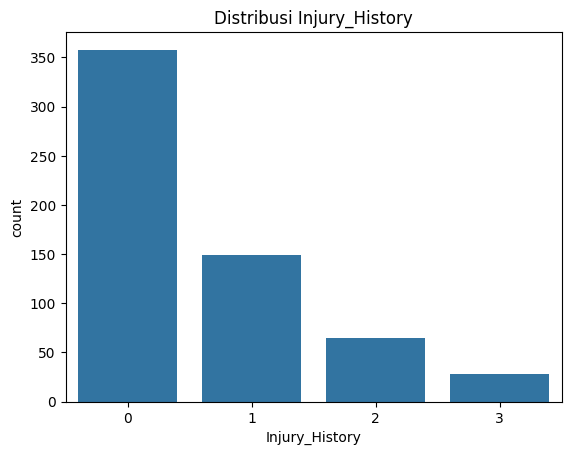

In [9]:
print(df["Injury_History"].value_counts())
sns.countplot(x="Injury_History", data=df)
plt.title("Distribusi Injury_History")
plt.show()

##### _Outlier_

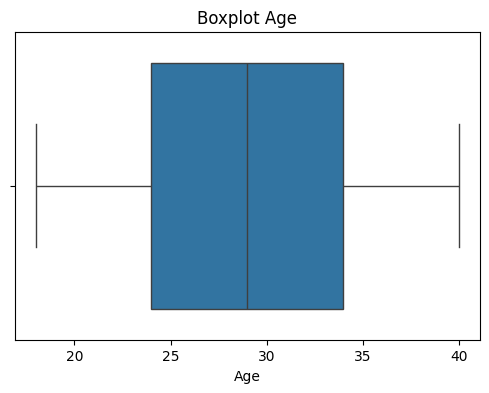

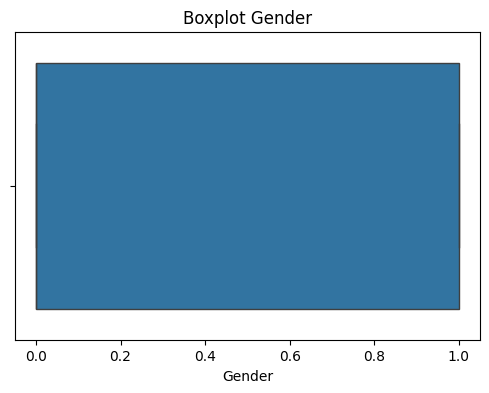

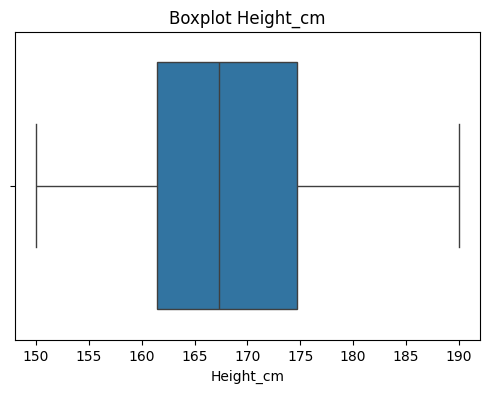

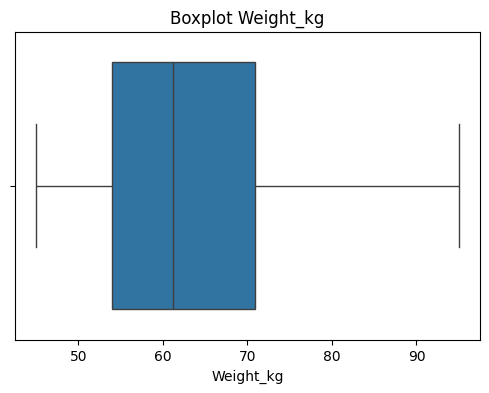

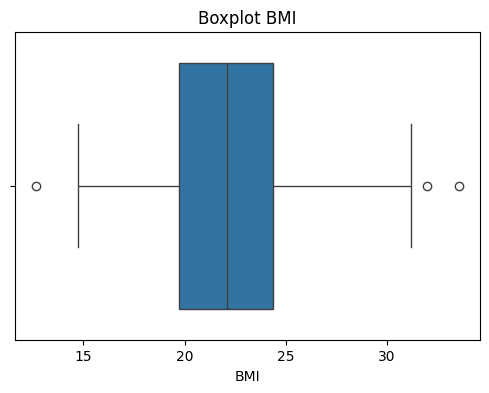

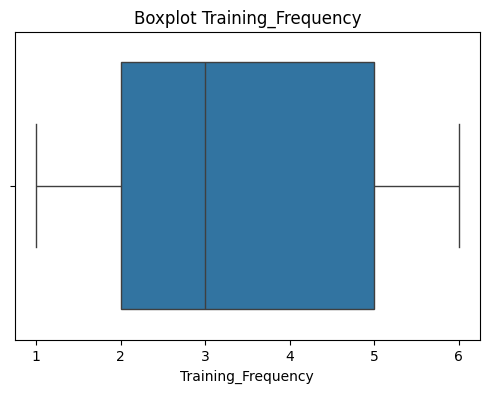

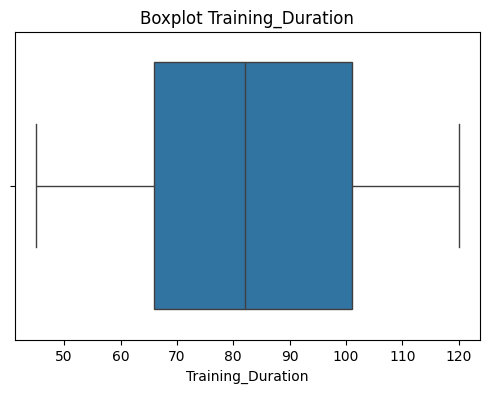

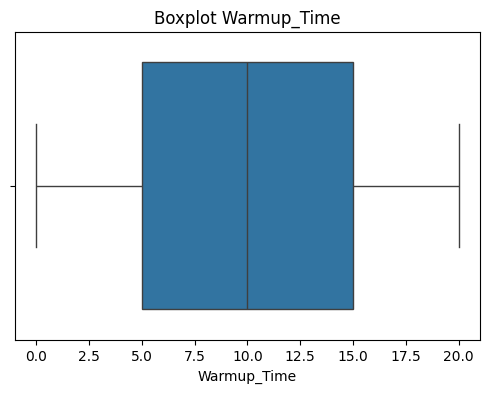

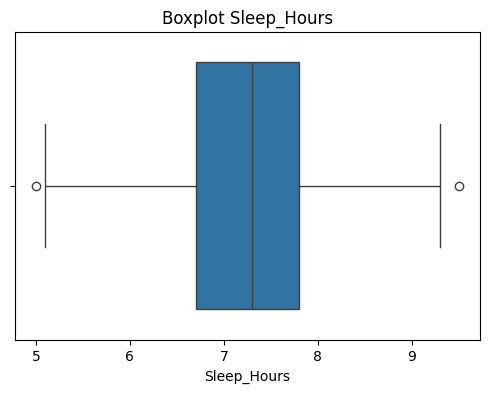

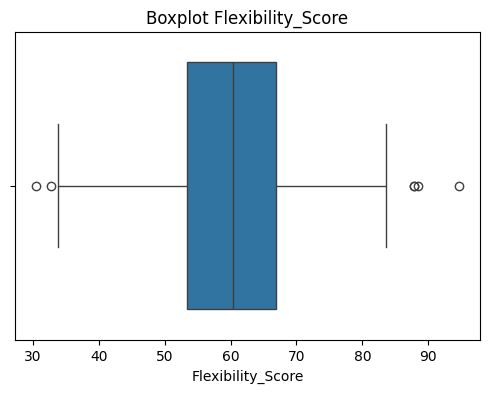

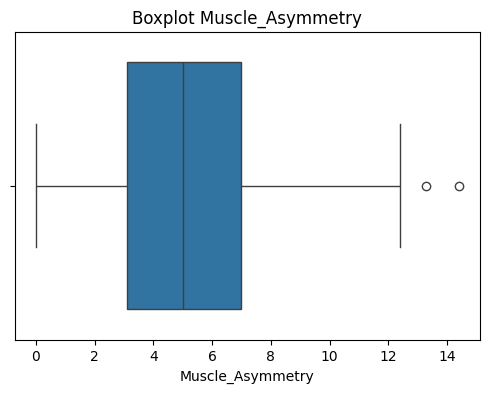

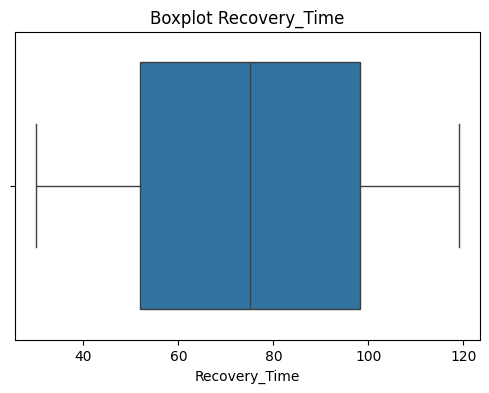

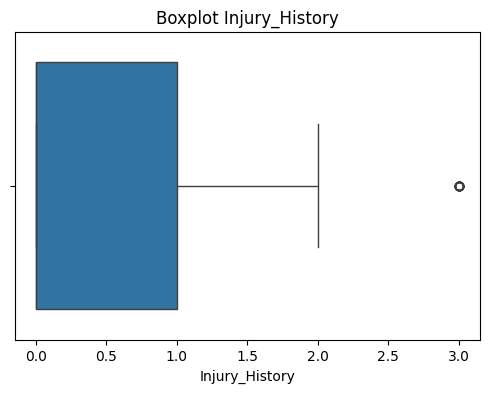

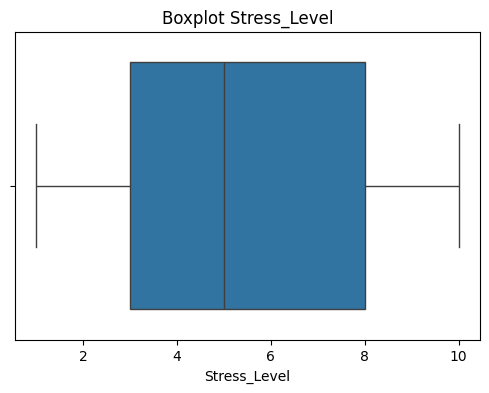

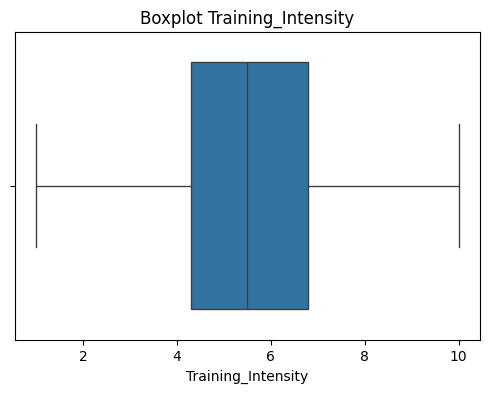

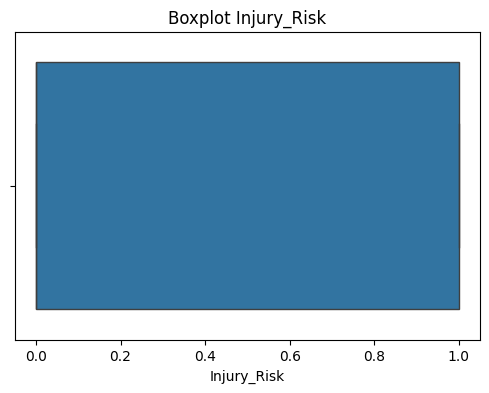

In [10]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()

In [11]:
import numpy as np

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return len(outliers)

In [12]:
for col in df.columns:
    if col != 'Injury_Risk':
        outlier_count = detect_outliers_iqr(df, col)
        print(f"{col}: {outlier_count} outliers")

Age: 0 outliers
Gender: 0 outliers
Height_cm: 0 outliers
Weight_kg: 0 outliers
BMI: 3 outliers
Training_Frequency: 0 outliers
Training_Duration: 0 outliers
Warmup_Time: 0 outliers
Sleep_Hours: 2 outliers
Flexibility_Score: 6 outliers
Muscle_Asymmetry: 2 outliers
Recovery_Time: 0 outliers
Injury_History: 28 outliers
Stress_Level: 0 outliers
Training_Intensity: 0 outliers


##### _korelasi_

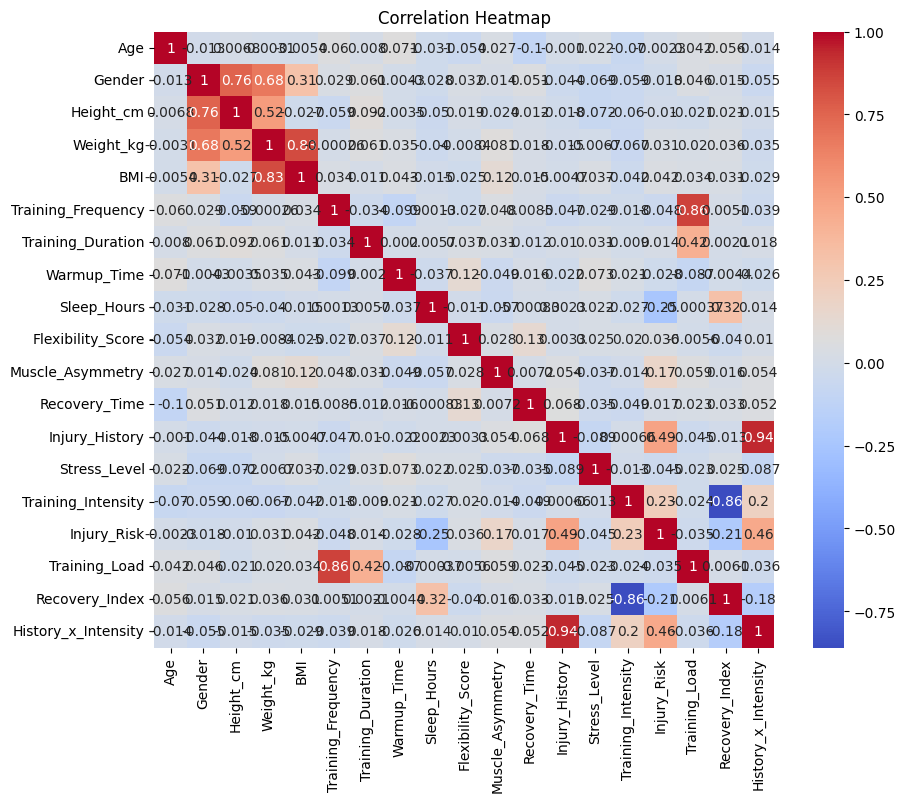

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### __**EDA**__

   Age  Gender  Height_cm  Weight_kg    BMI  Training_Frequency  \
0   36       0      155.4       56.3  23.34                   1   
1   30       0      167.6       45.3  16.12                   4   
2   21       1      176.7       60.8  19.48                   1   
3   37       0      170.2       60.7  20.97                   5   
4   30       0      161.5       45.0  17.25                   6   

   Training_Duration  Warmup_Time  Sleep_Hours  Flexibility_Score  \
0                 94           20          7.2               63.3   
1                114            5          7.1               64.6   
2                 95           11          5.0               68.6   
3                 73            6          8.1               69.0   
4                 93            8          7.8               45.2   

   Muscle_Asymmetry  Recovery_Time  Injury_History  Stress_Level  \
0               3.7             63               1             8   
1               5.1             64            

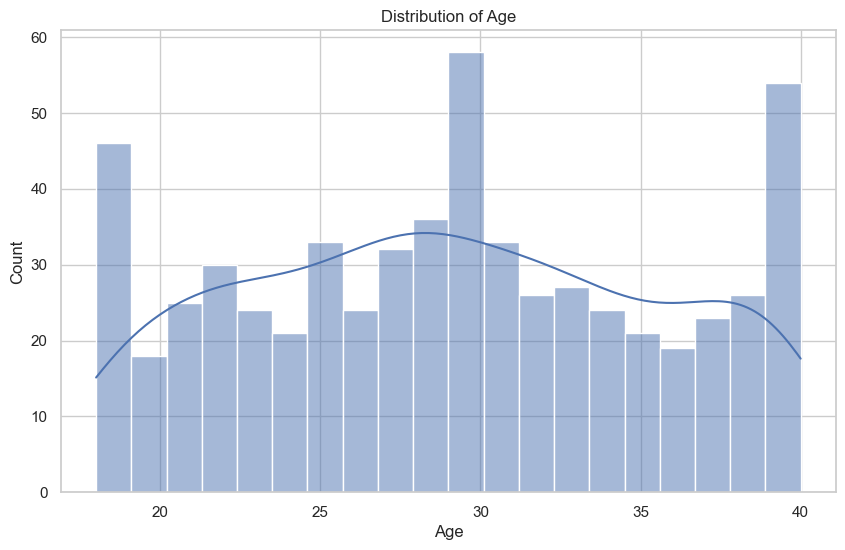

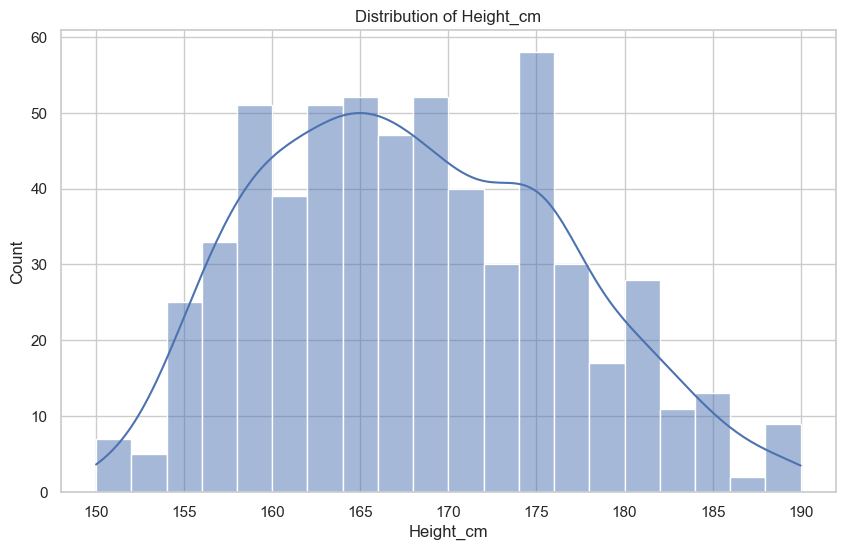

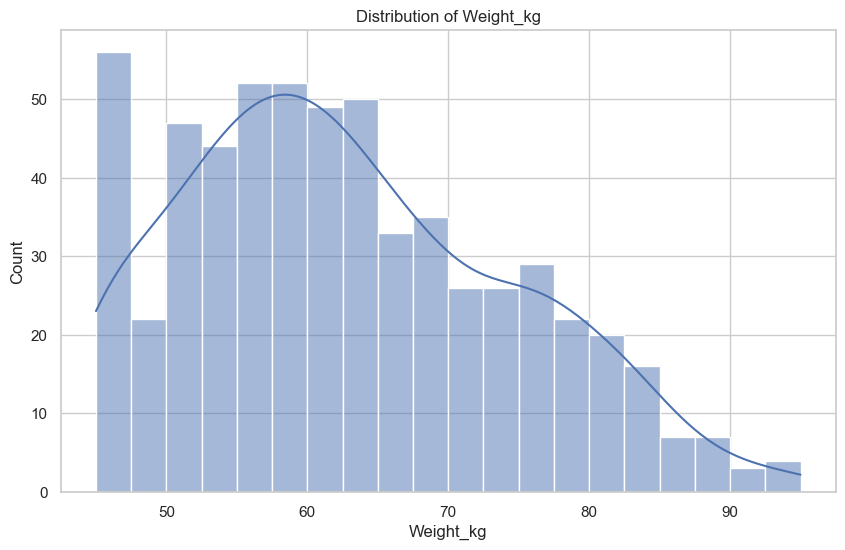

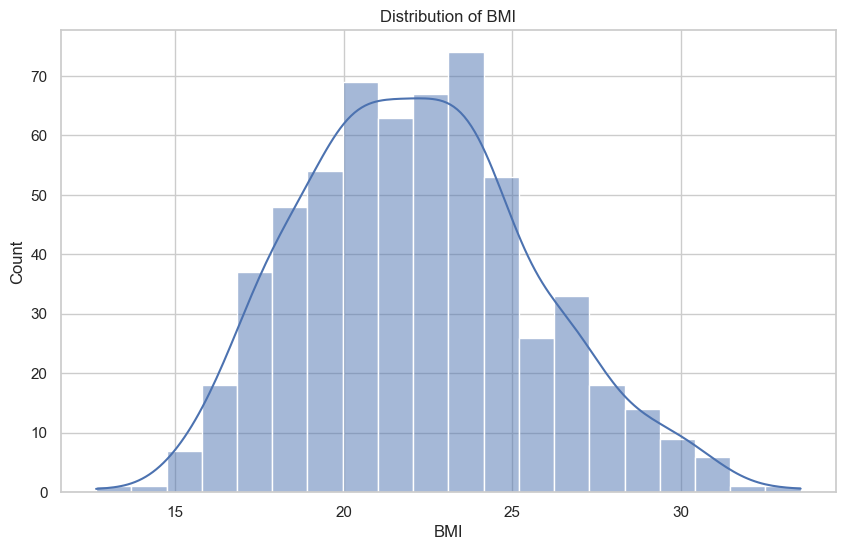

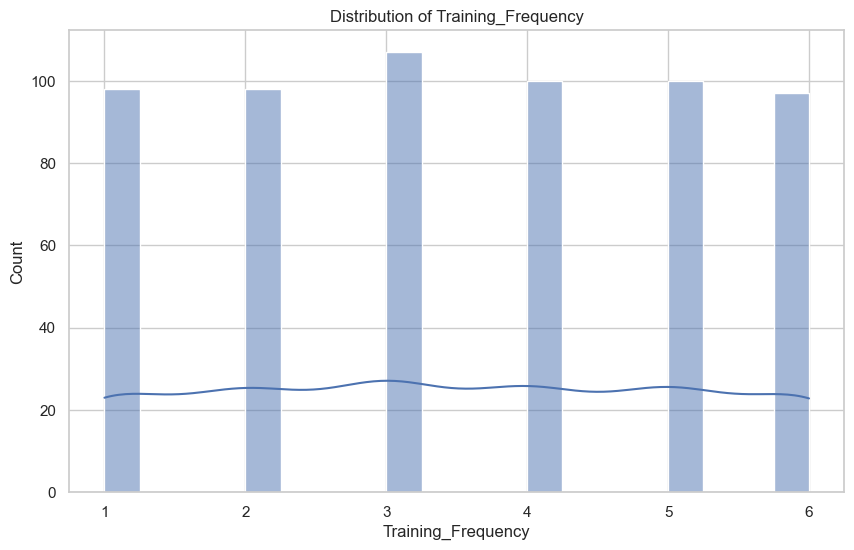

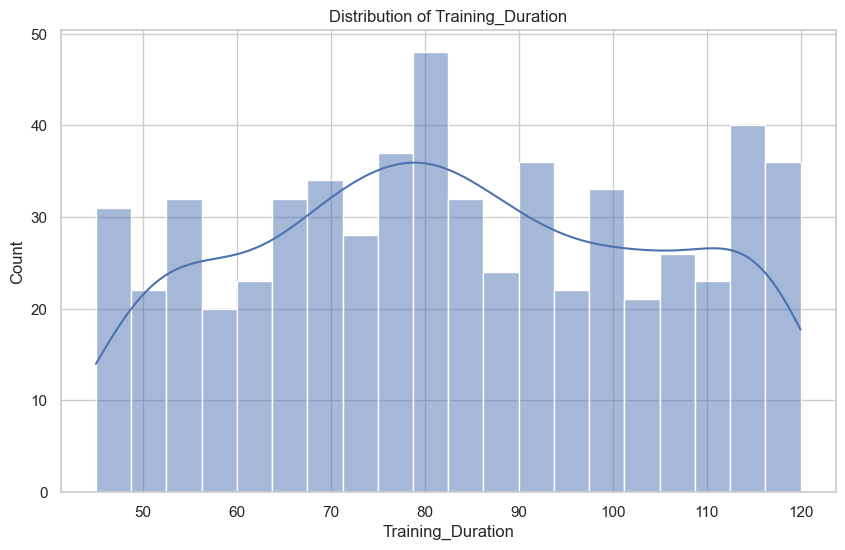

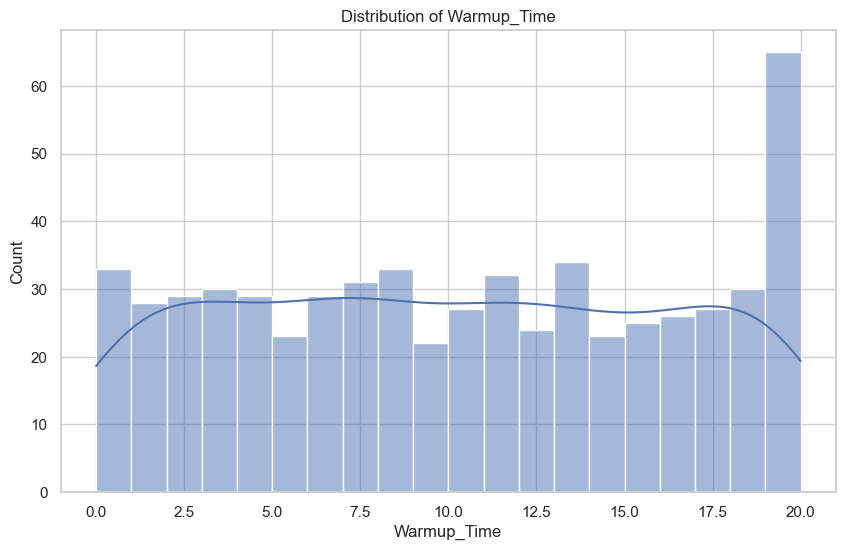

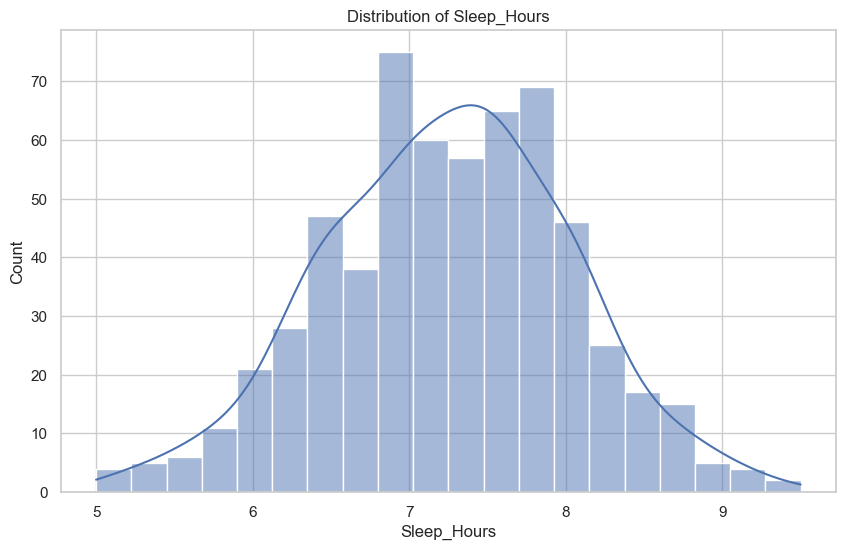

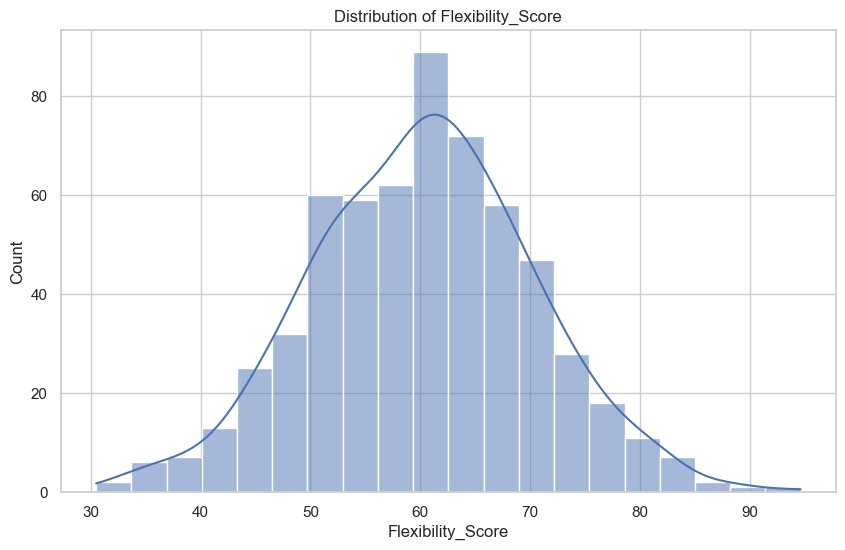

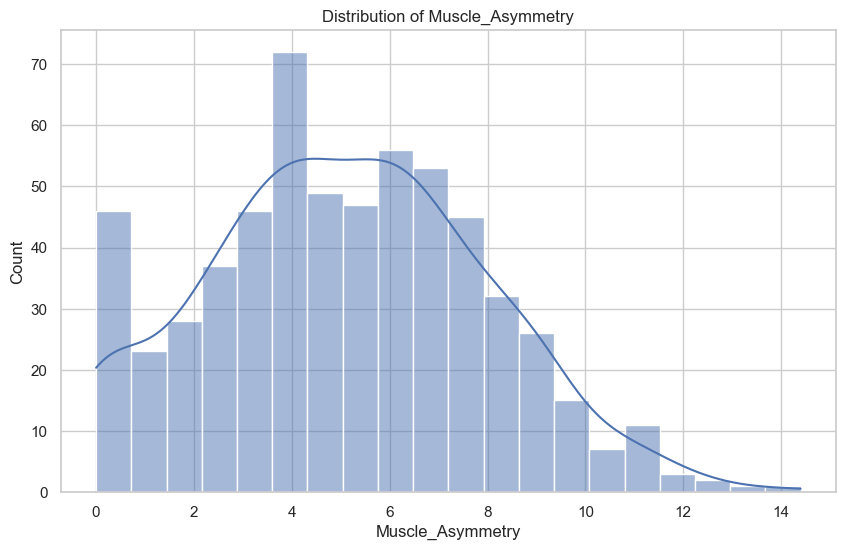

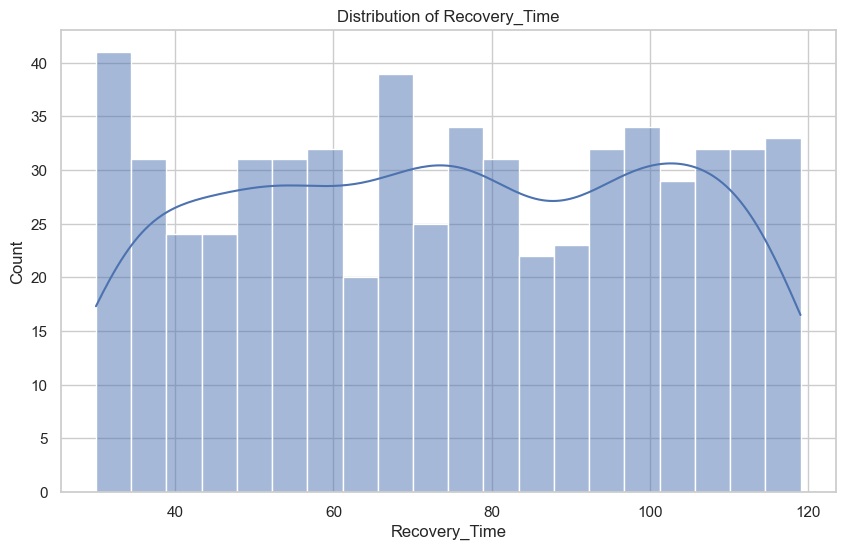

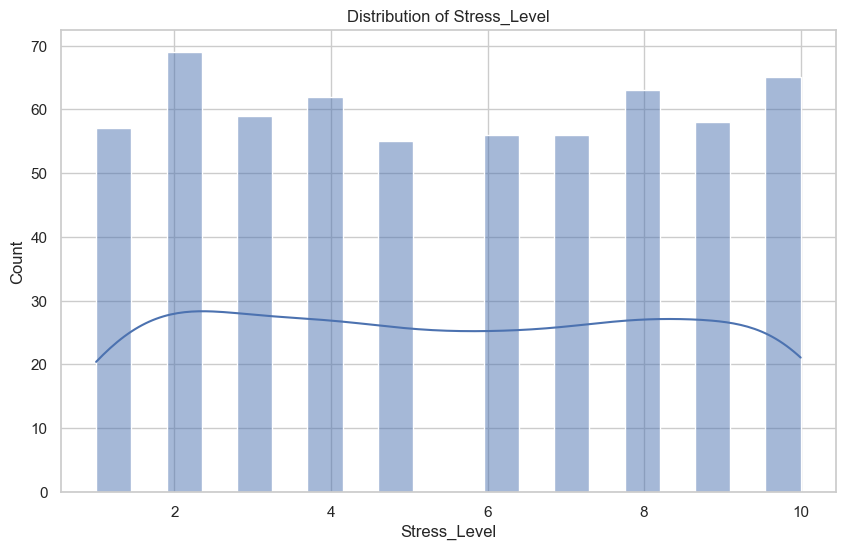

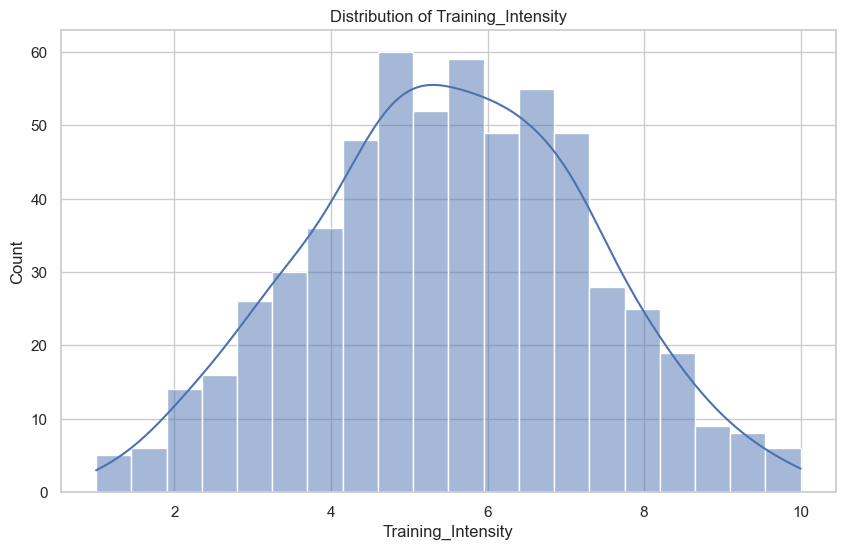

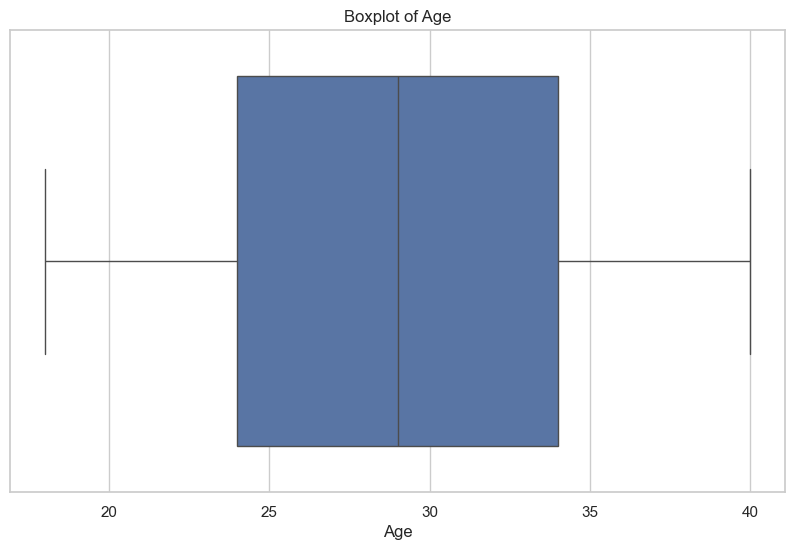

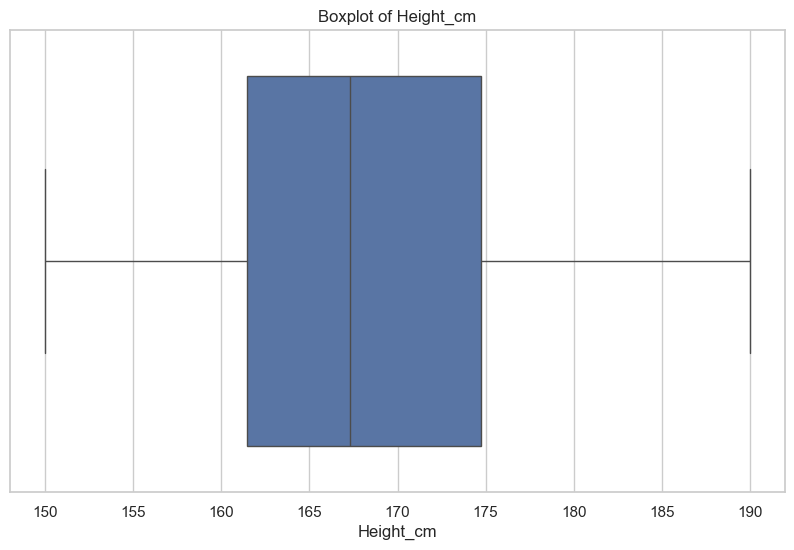

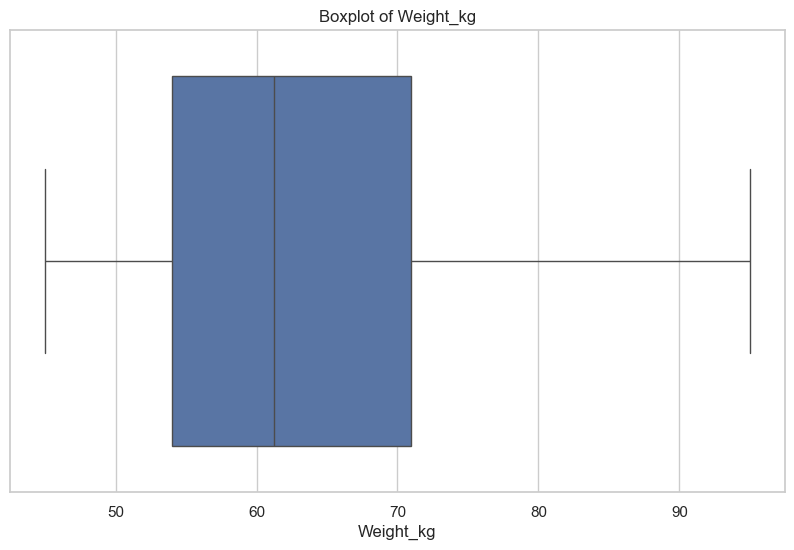

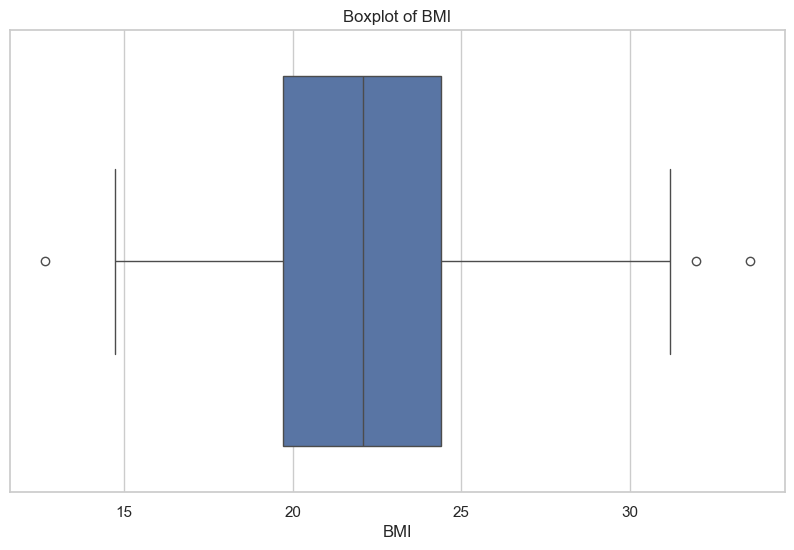

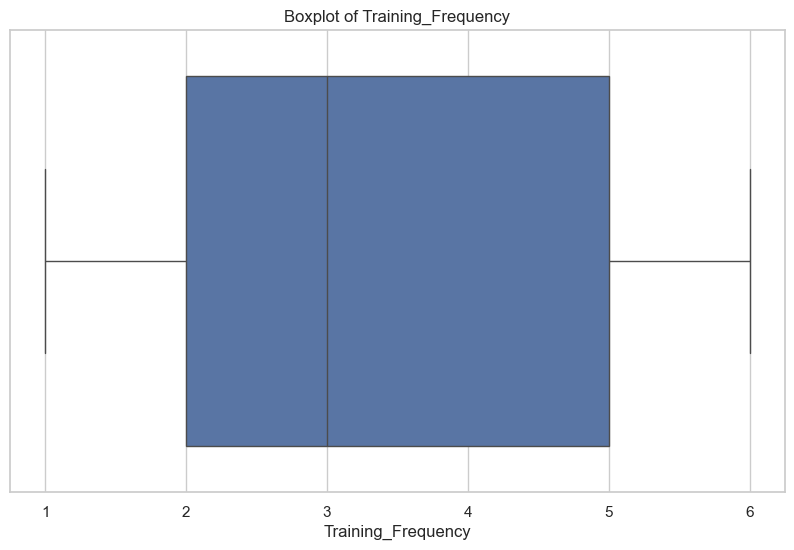

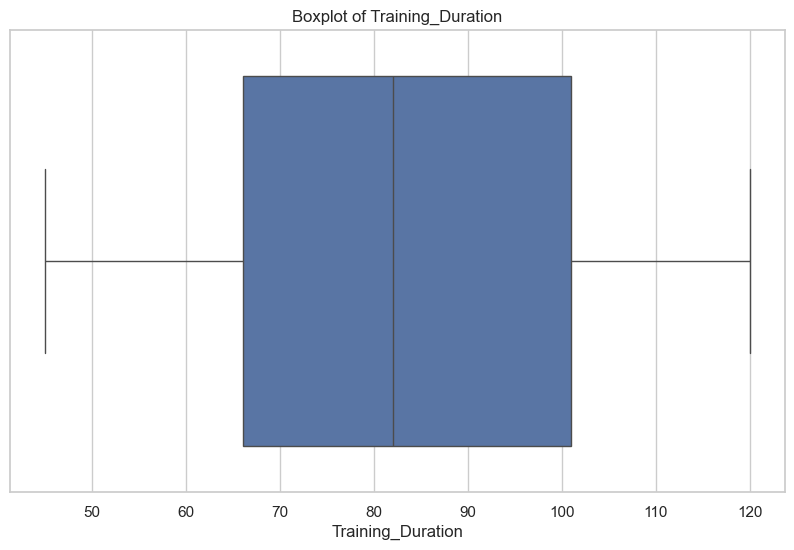

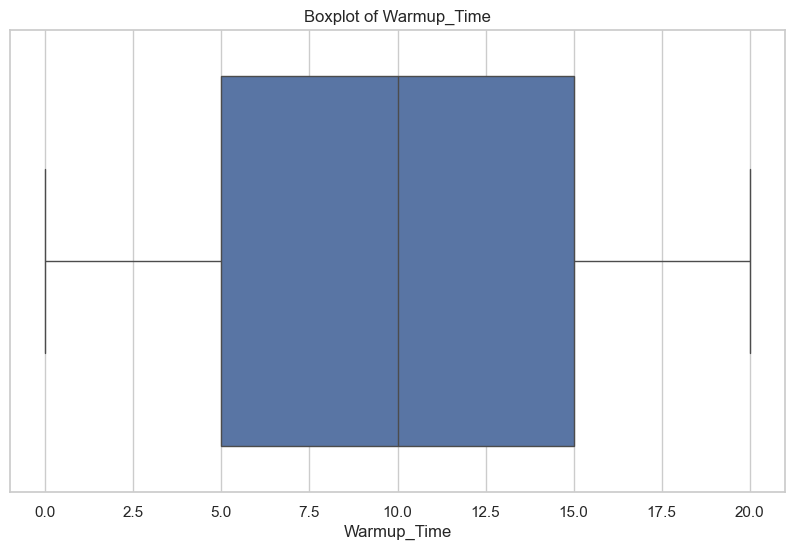

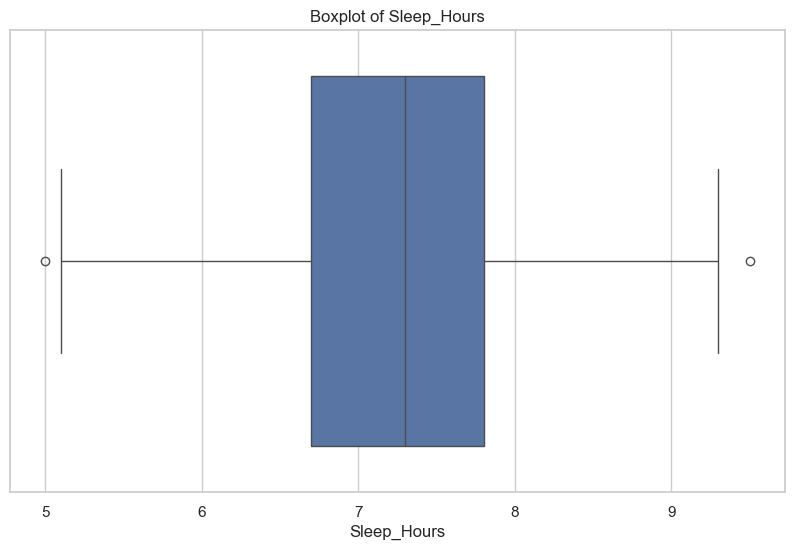

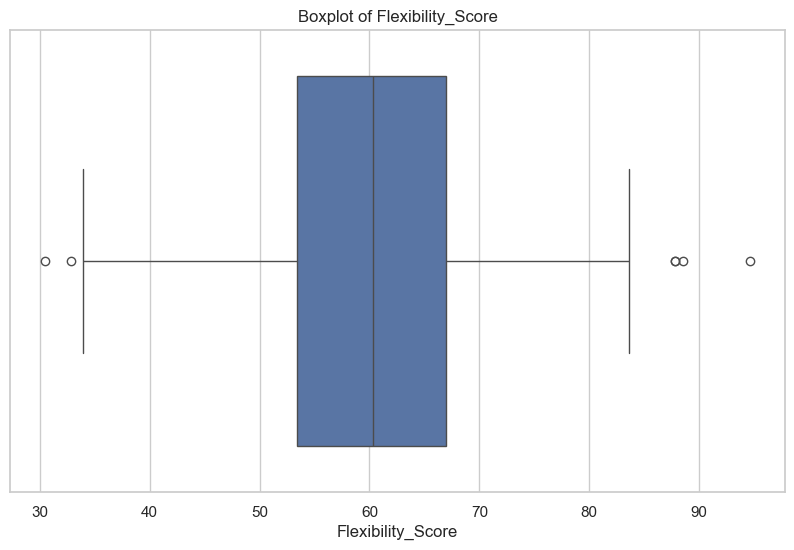

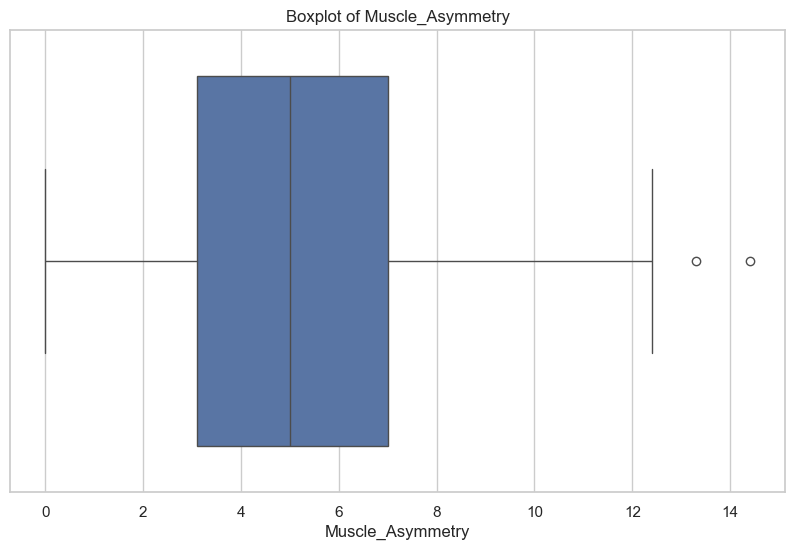

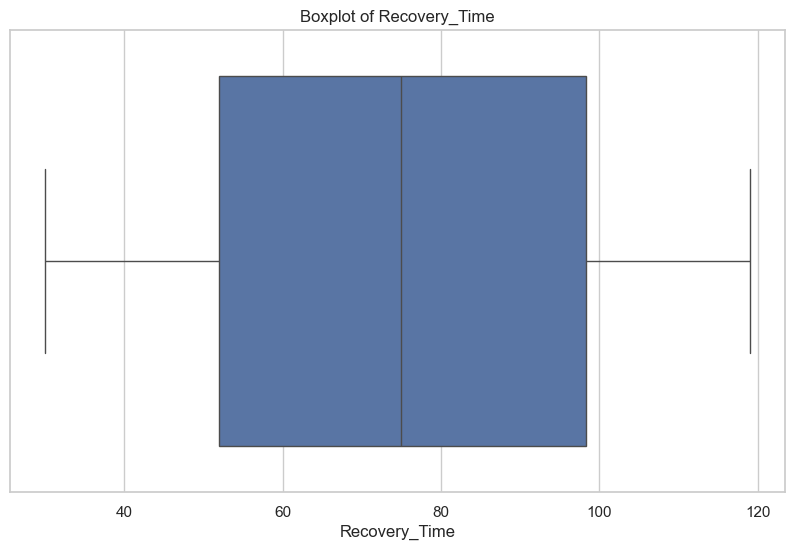

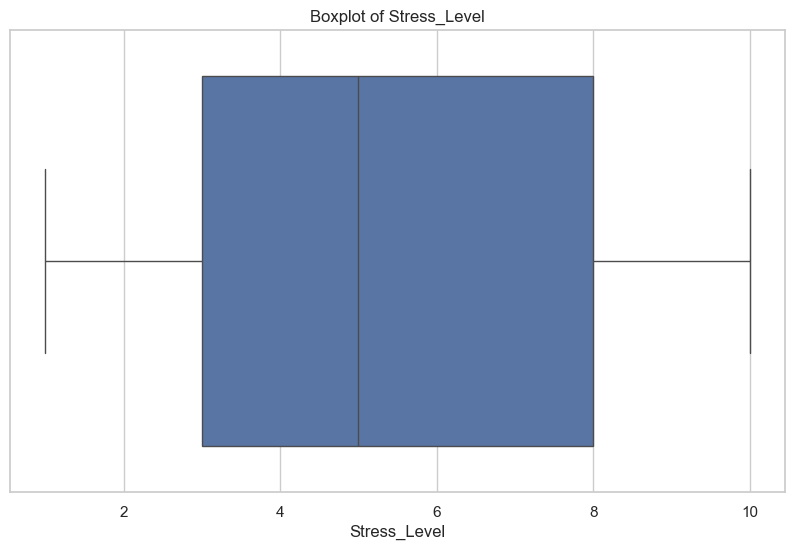

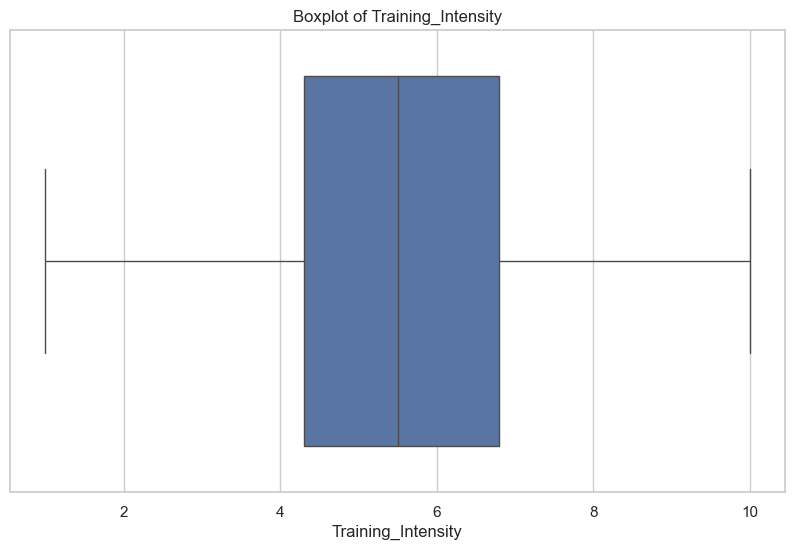

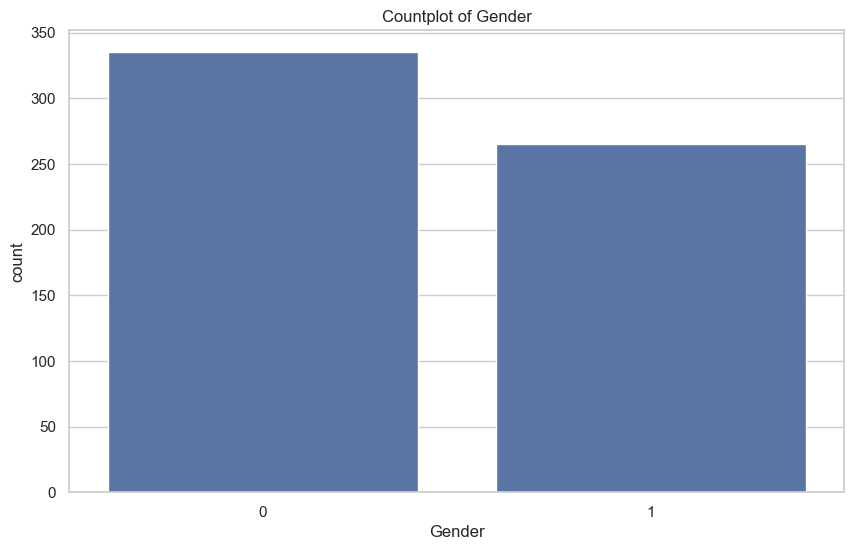

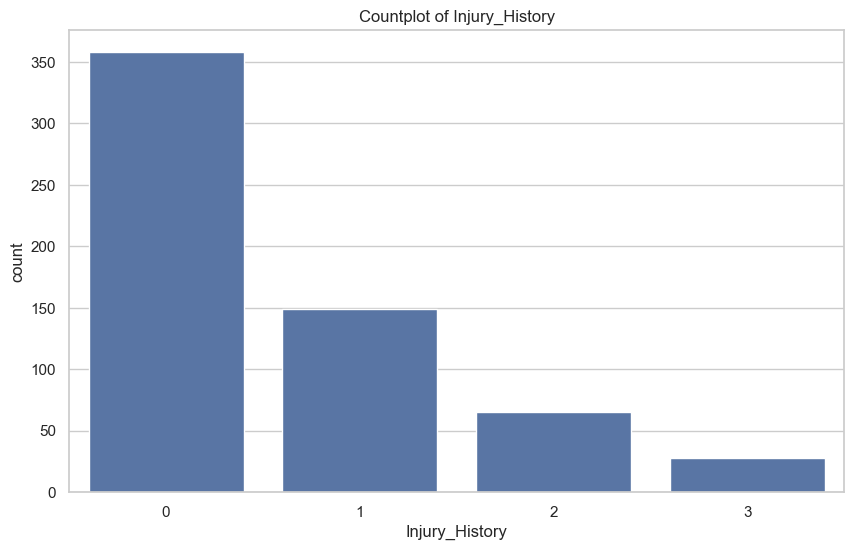

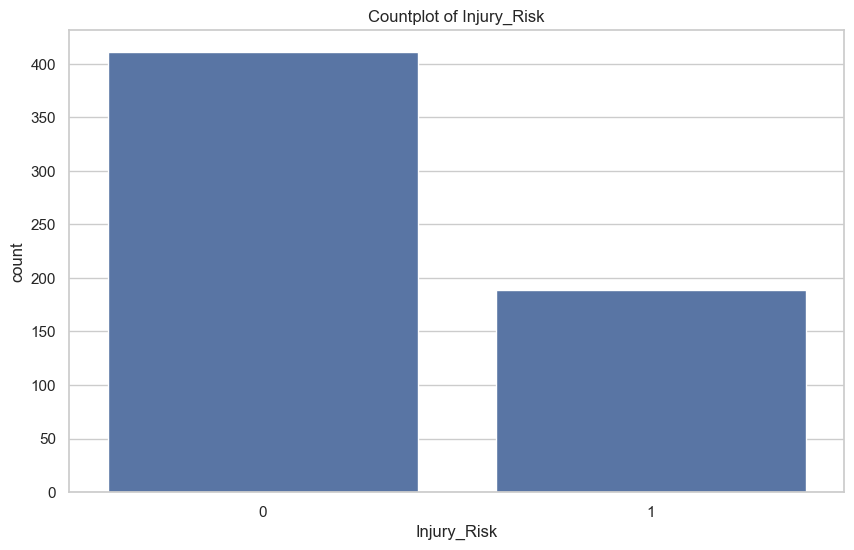


Value counts for Gender:
Gender
0    0.558333
1    0.441667
Name: proportion, dtype: float64

Value counts for Injury_History:
Injury_History
0    0.596667
1    0.248333
2    0.108333
3    0.046667
Name: proportion, dtype: float64

Value counts for Injury_Risk:
Injury_Risk
0    0.685
1    0.315
Name: proportion, dtype: float64


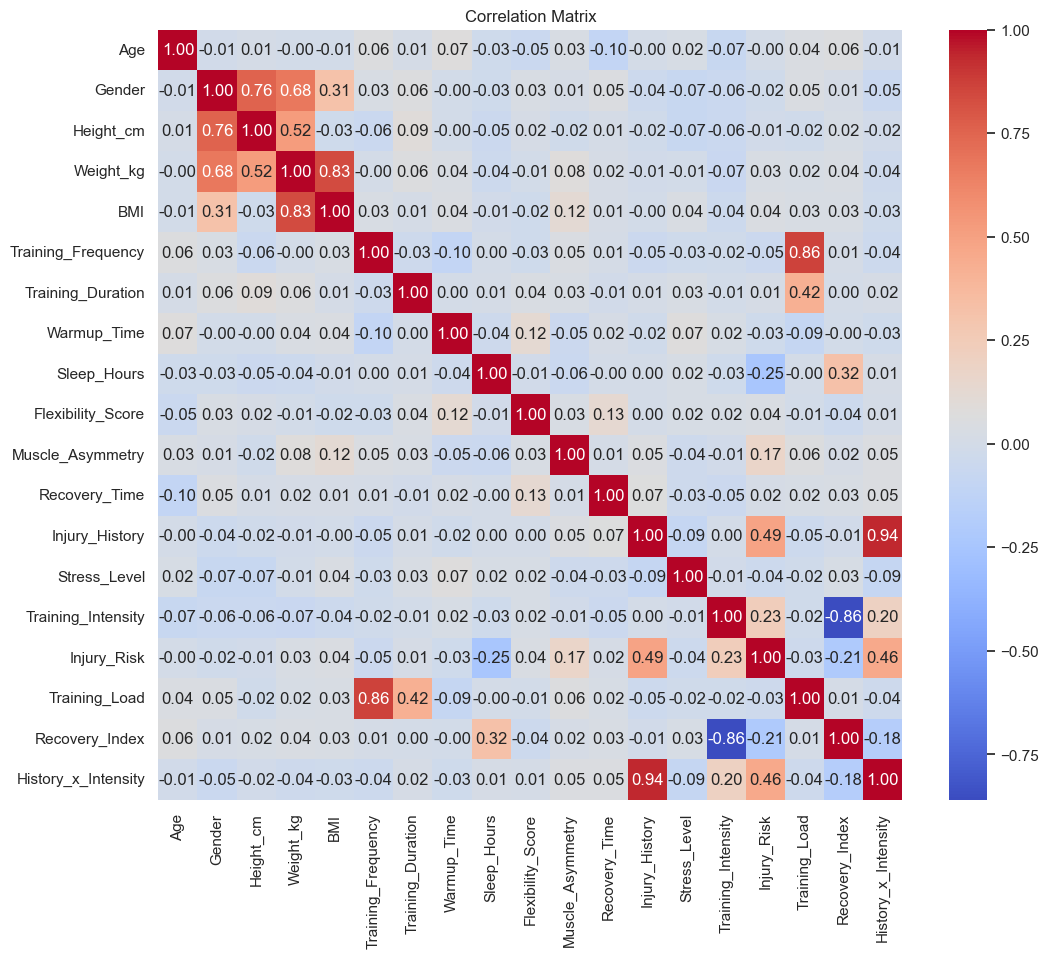

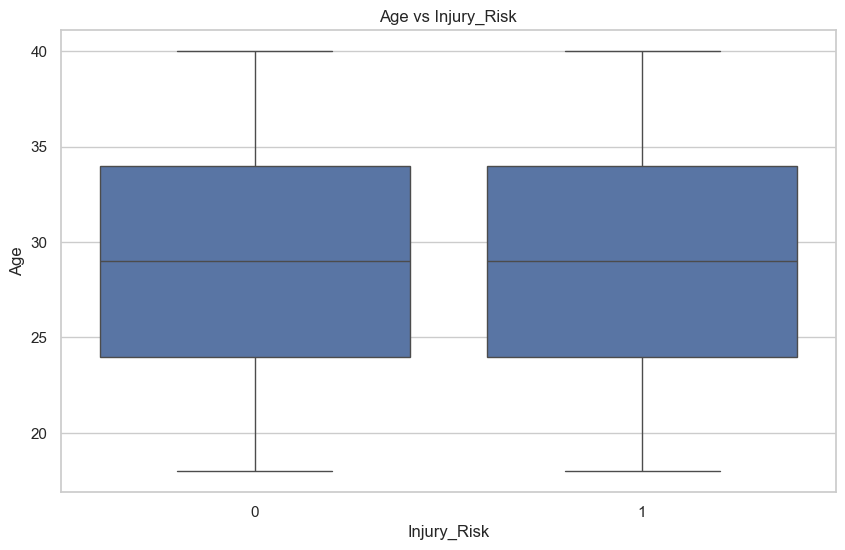

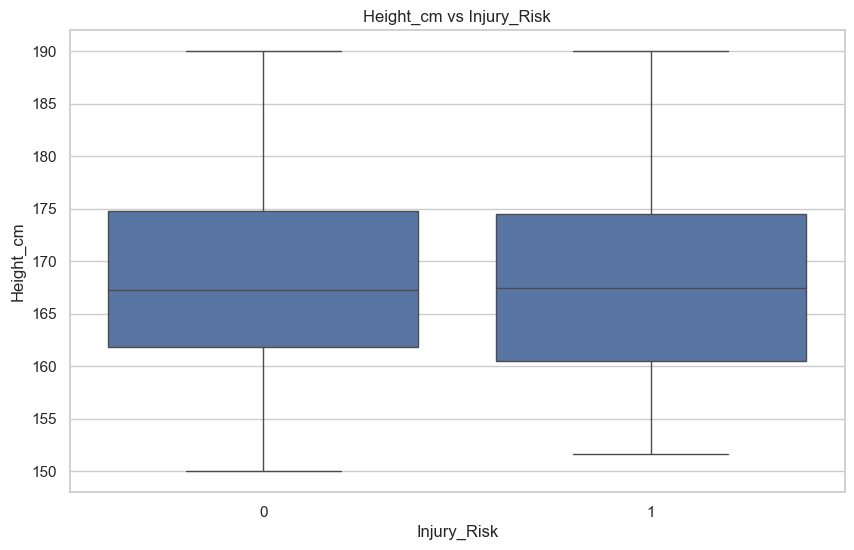

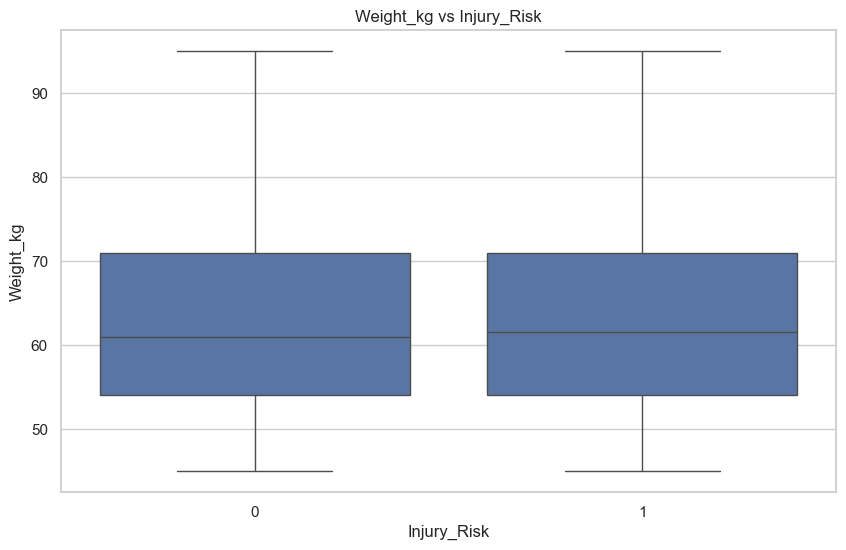

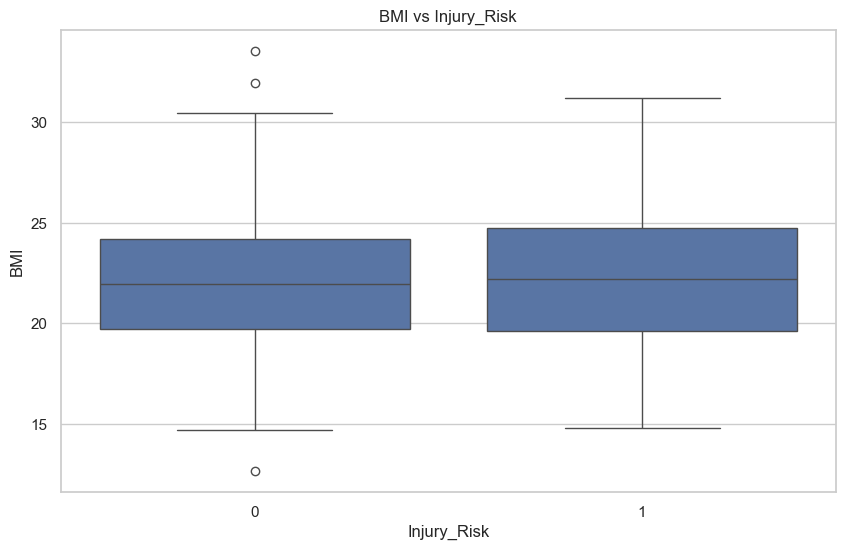

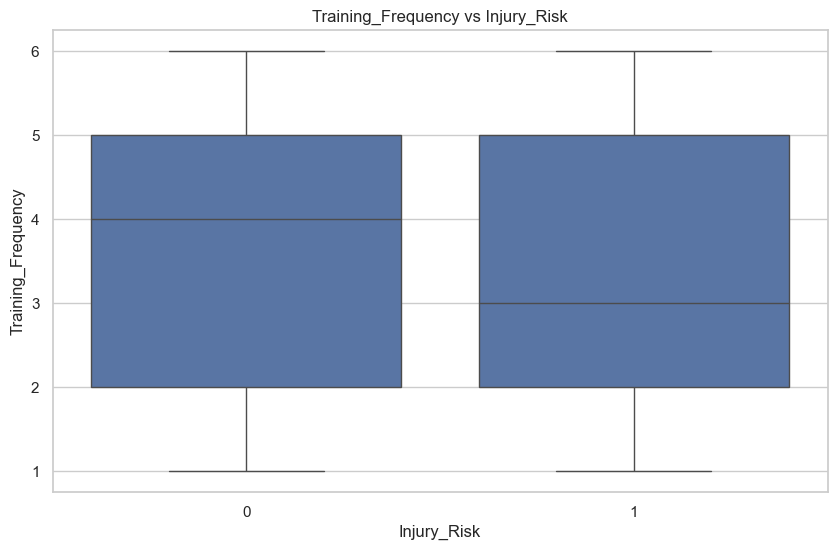

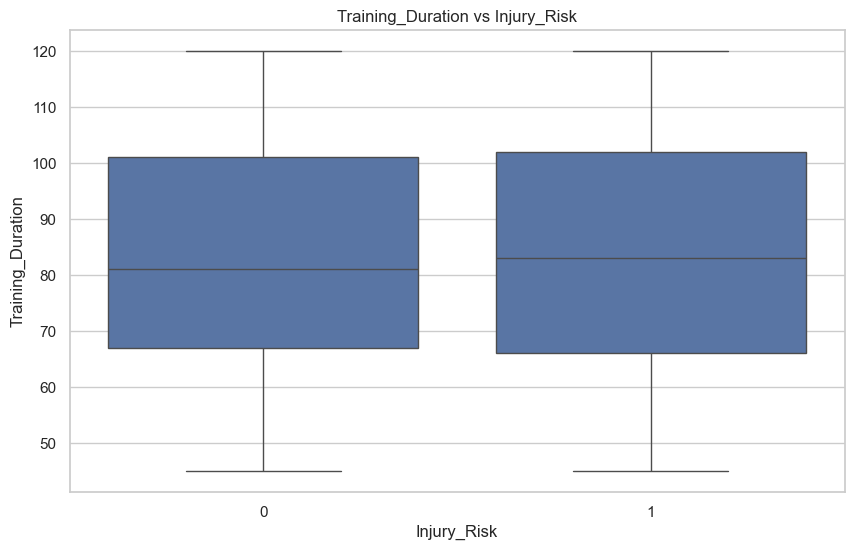

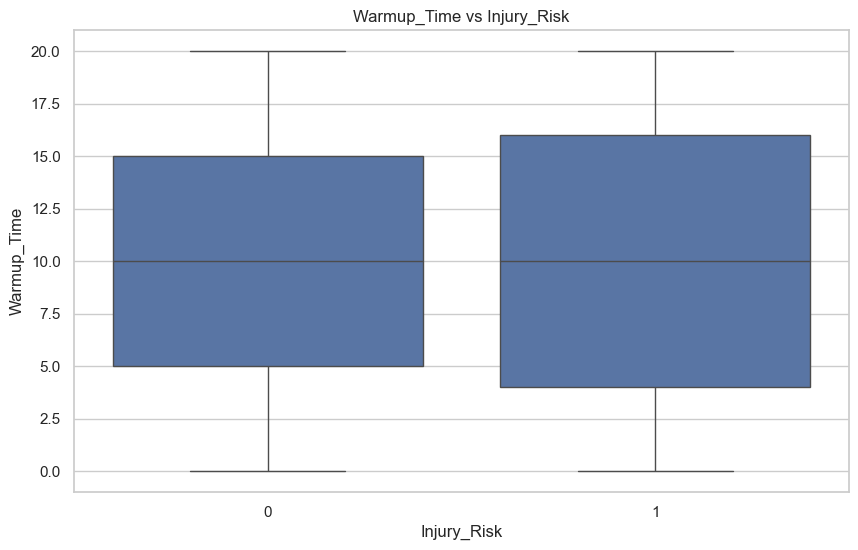

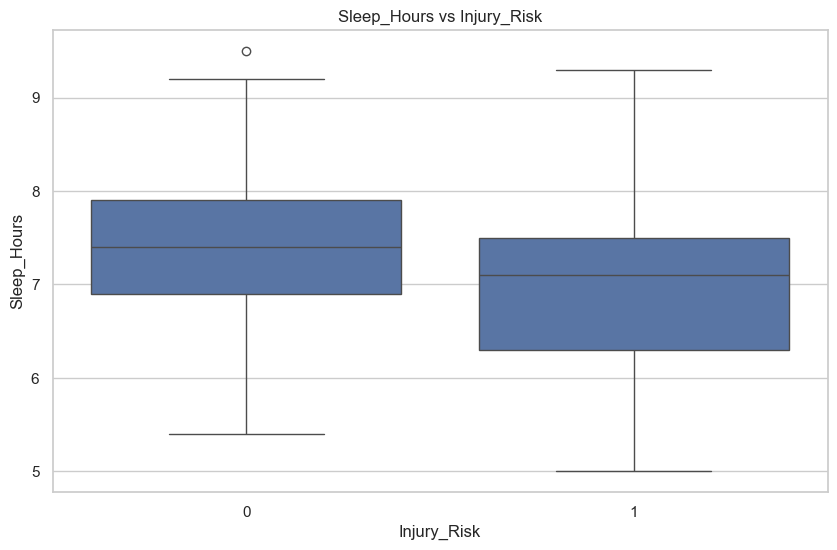

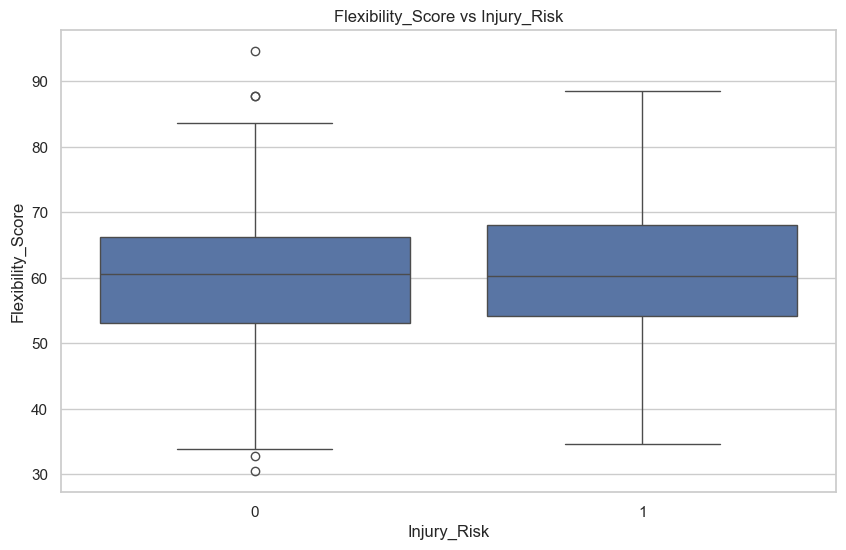

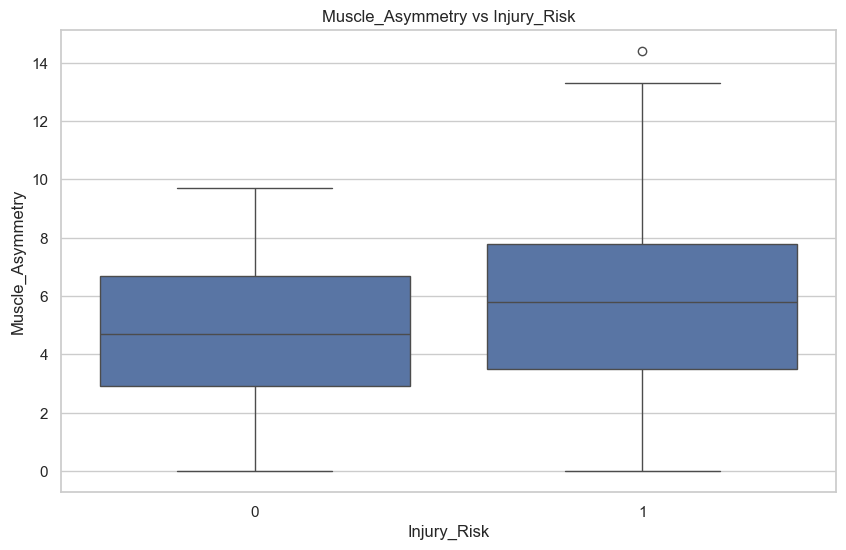

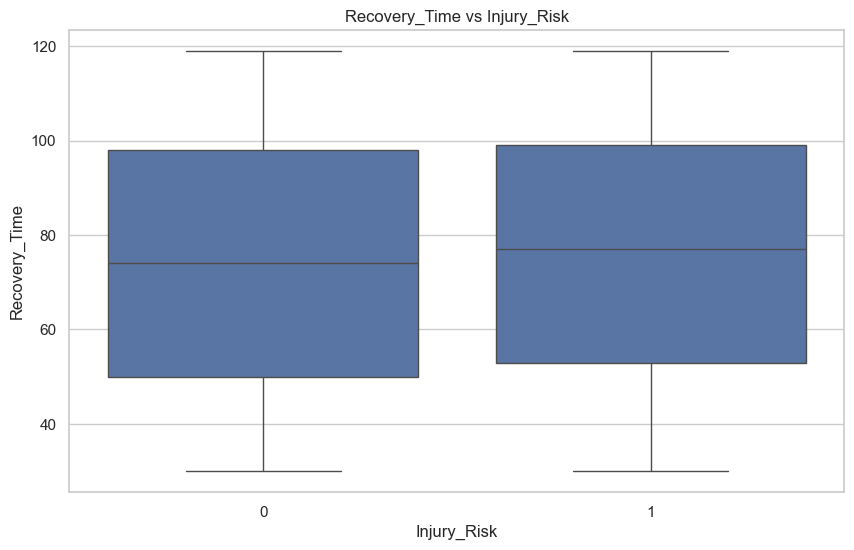

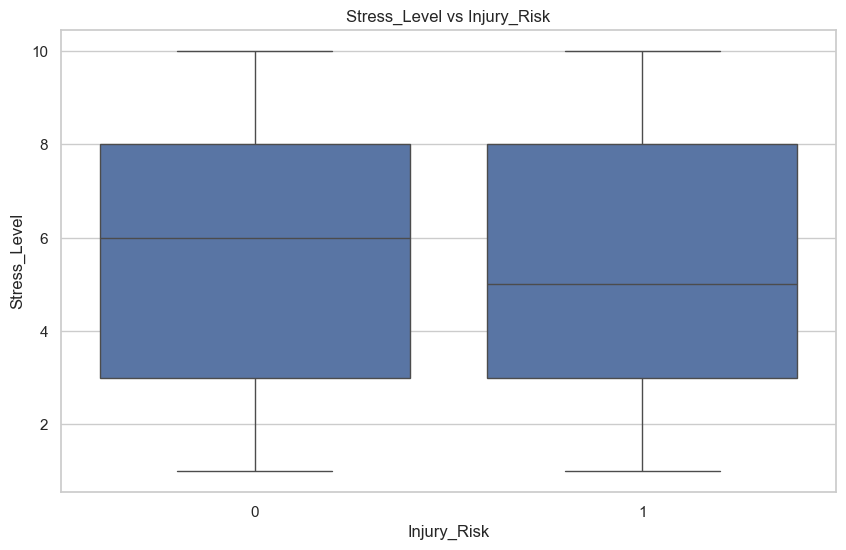

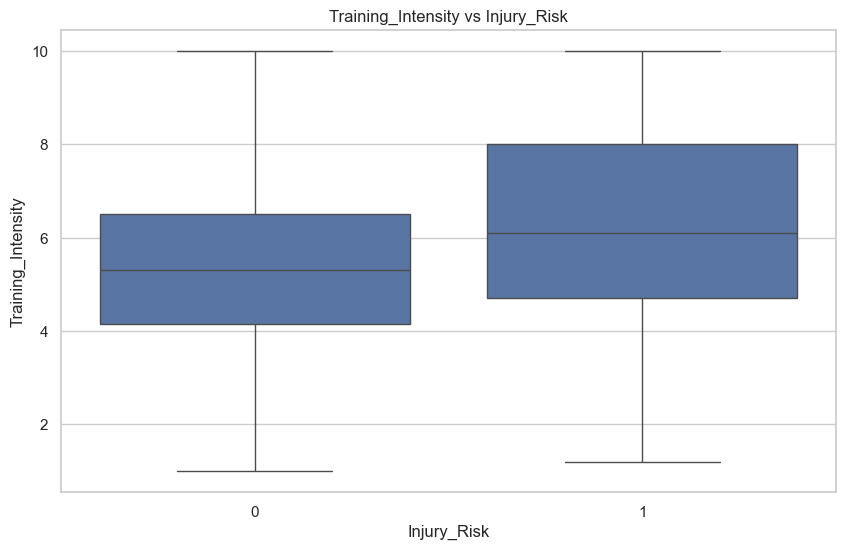

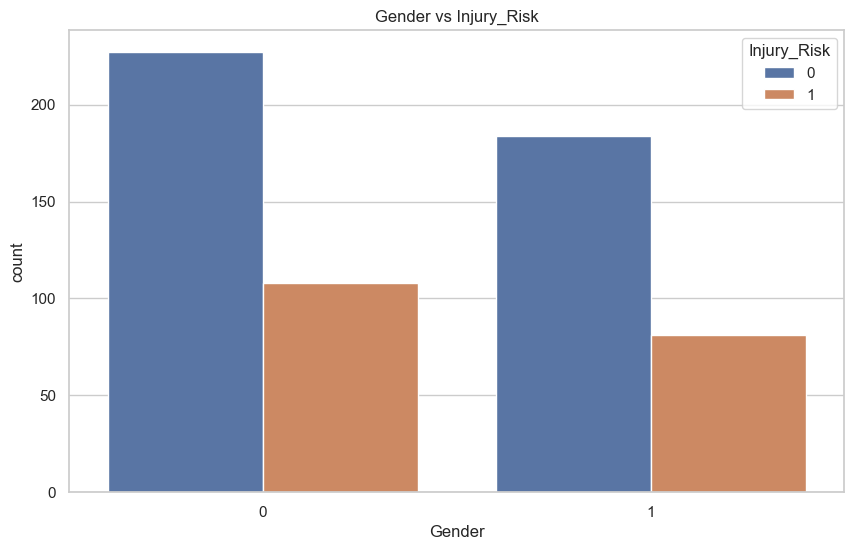

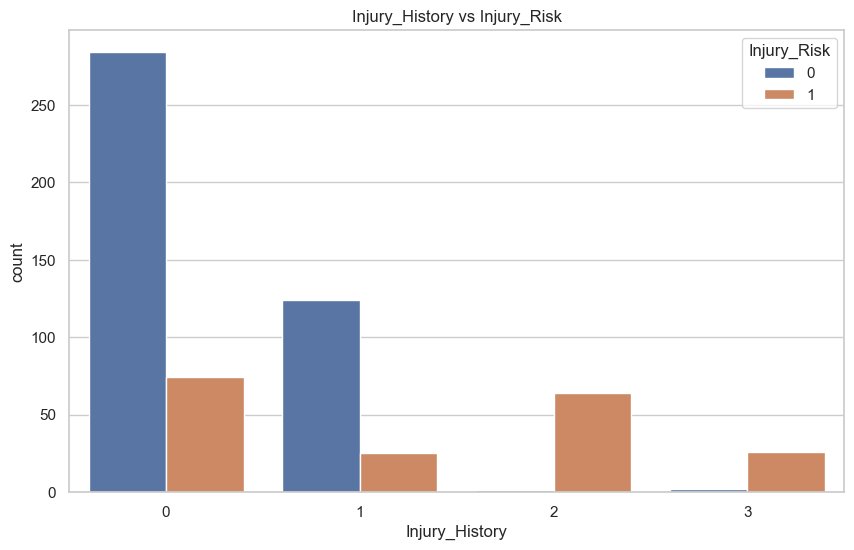

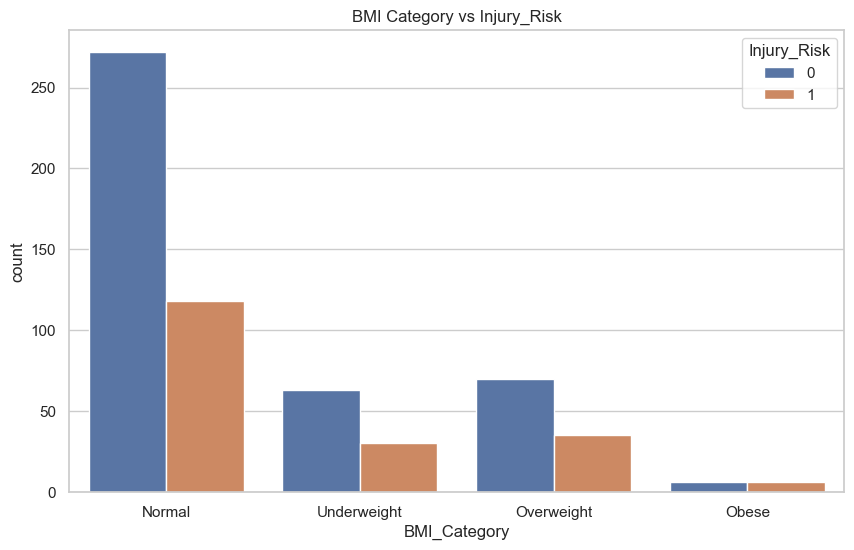

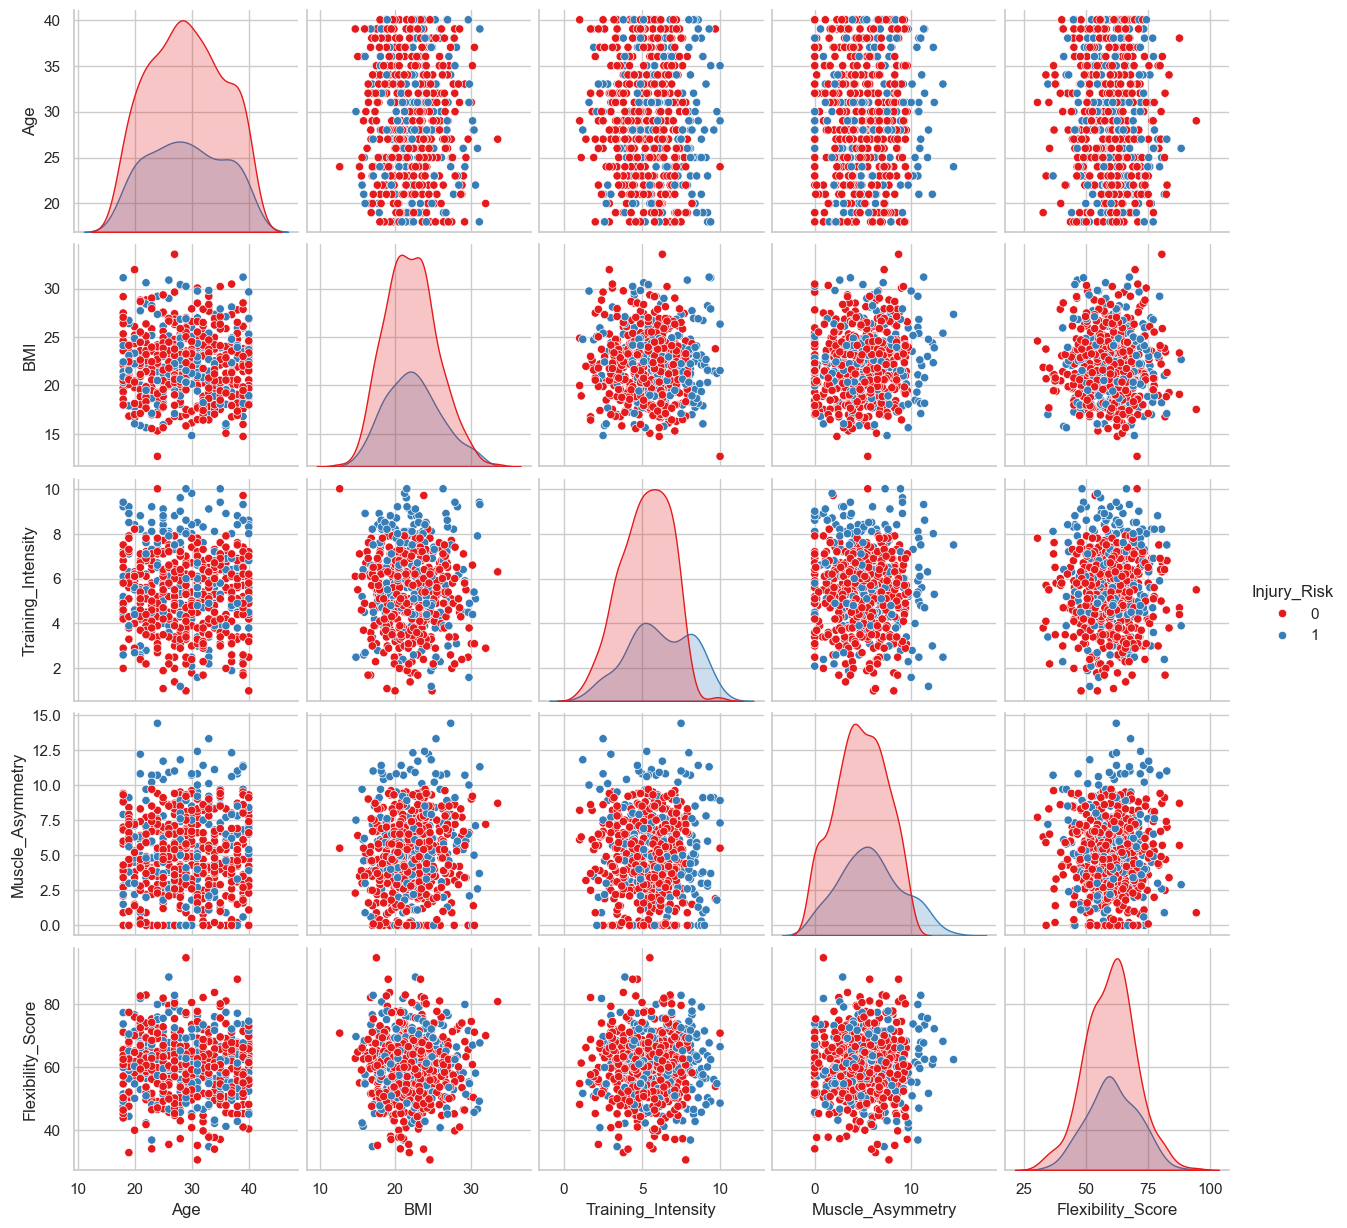

In [26]:
# ========================================
# EDA Dataset Injury Risk
# ========================================

# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# ========================================
# 2. Load dataset
# ========================================
# Jika dataset dalam CSV

# Lihat 5 baris pertama
print(df.head())

# Info dataset & tipe data
print(df.info())

# Statistik deskriptif numerik
print(df.describe())

# Cek missing values
print(df.isnull().sum())

# ========================================
# 3. Distribusi Fitur Numerik
# ========================================
numerical_features = ['Age','Height_cm','Weight_kg','BMI','Training_Frequency',
                      'Training_Duration','Warmup_Time','Sleep_Hours','Flexibility_Score',
                      'Muscle_Asymmetry','Recovery_Time','Stress_Level','Training_Intensity']

for col in numerical_features:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplot untuk outlier
for col in numerical_features:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# ========================================
# 4. Distribusi Fitur Kategorik
# ========================================
categorical_features = ['Gender','Injury_History','Injury_Risk']

for col in categorical_features:
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.show()

# Proporsi masing-masing kategori
for col in categorical_features:
    print(f"\nValue counts for {col}:\n{df[col].value_counts(normalize=True)}")

# ========================================
# 5. Korelasi Fitur
# ========================================
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# ========================================
# 6. Analisis Fitur vs Target Injury_Risk
# ========================================

# Numeric features vs Injury_Risk (boxplot)
for col in numerical_features:
    plt.figure()
    sns.boxplot(x='Injury_Risk', y=col, data=df)
    plt.title(f'{col} vs Injury_Risk')
    plt.show()

# Categorical features vs Injury_Risk
categorical_features2 = ['Gender','Injury_History']
for col in categorical_features2:
    plt.figure()
    sns.countplot(x=col, hue='Injury_Risk', data=df)
    plt.title(f'{col} vs Injury_Risk')
    plt.show()

# ========================================
# 7. Feature Engineering (opsional)
# ========================================

# Contoh membuat kategori BMI
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df['BMI_Category'] = df['BMI'].apply(bmi_category)

plt.figure()
sns.countplot(x='BMI_Category', hue='Injury_Risk', data=df)
plt.title("BMI Category vs Injury_Risk")
plt.show()

# ========================================
# 8. Scatterplot beberapa fitur penting vs Injury_Risk
# ========================================
sns.pairplot(df, vars=['Age','BMI','Training_Intensity','Muscle_Asymmetry','Flexibility_Score'],
             hue='Injury_Risk', palette='Set1', diag_kind='kde')
plt.show()

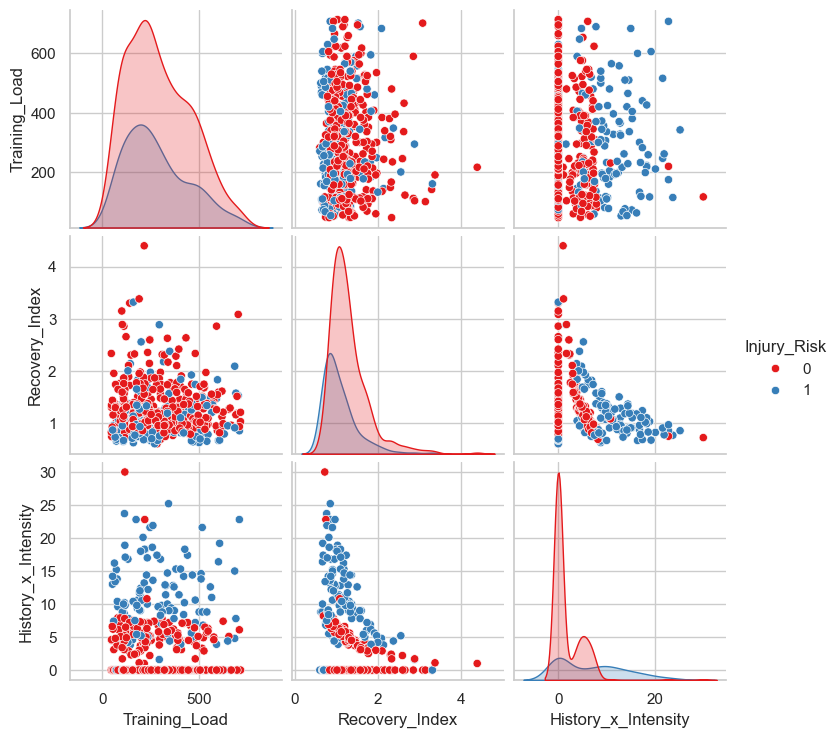

In [28]:
sns.pairplot(df, vars=['Training_Load','Recovery_Index','History_x_Intensity'],
             hue='Injury_Risk', palette='Set1', diag_kind='kde')
plt.show()

### __**DATA PREPROCESSING**__

_Feature Engineering_

In [27]:
df["Training_Load"] = df["Training_Frequency"] * df["Training_Duration"]
df["Recovery_Index"] = df["Sleep_Hours"] / (df["Training_Intensity"] + 1)
df["History_x_Intensity"] = df["Injury_History"] * df["Training_Intensity"]

In [16]:
X = df.drop("Injury_Risk", axis=1)
y = df["Injury_Risk"]

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (600, 18)
Shape y: (600,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (480, 18)
Test size: (120, 18)


##### _Scaling_

In [18]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
print("Train distribution:")
print(y_train.value_counts(normalize=True))

print("Test distribution:")
print(y_test.value_counts(normalize=True))

Train distribution:
Injury_Risk
0    0.685417
1    0.314583
Name: proportion, dtype: float64
Test distribution:
Injury_Risk
0    0.683333
1    0.316667
Name: proportion, dtype: float64


### __**MODELING**__

_LOGISTIC REGRESSION_

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train model
logreg = LogisticRegression(
    C=10,
    penalty='l1',
    solver='saga',
    max_iter=100,
    class_weight='balanced',
    n_jobs=-1
)
logreg.fit(X_train_scaled, y_train)

# Prediction
y_pred_lr = logreg.predict(X_test_scaled)
y_prob_lr = logreg.predict_proba(X_test_scaled)[:,1]

# Evaluation
acc_lr = accuracy_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_prob_lr)

print("=== Logistic Regression ===")
print("Accuracy:", acc_lr)
print("ROC-AUC:", roc_lr)
print(classification_report(y_test, y_pred_lr))

=== Logistic Regression ===
Accuracy: 0.7833333333333333
ROC-AUC: 0.8713093709884467
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        82
           1       0.65      0.68      0.67        38

    accuracy                           0.78       120
   macro avg       0.75      0.76      0.75       120
weighted avg       0.79      0.78      0.78       120



c:\Users\USER\Downloads\Injury-Risk-Prediction-main\Injury-Risk-Prediction-main\env\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


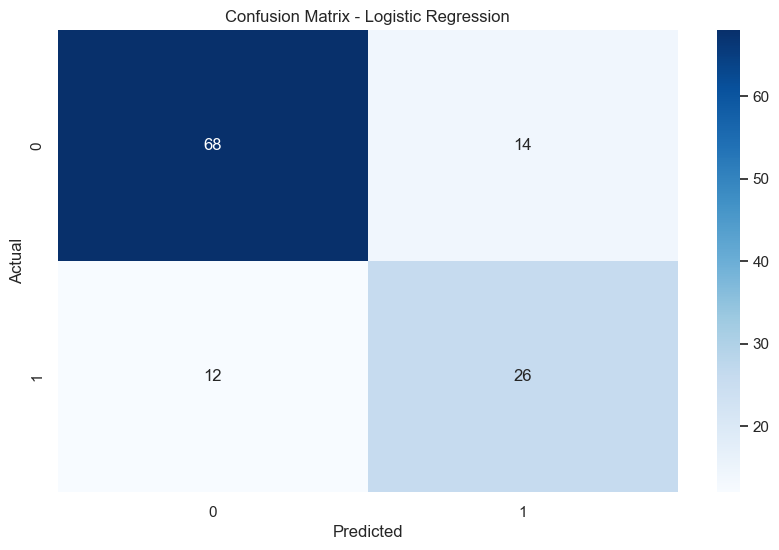

In [35]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

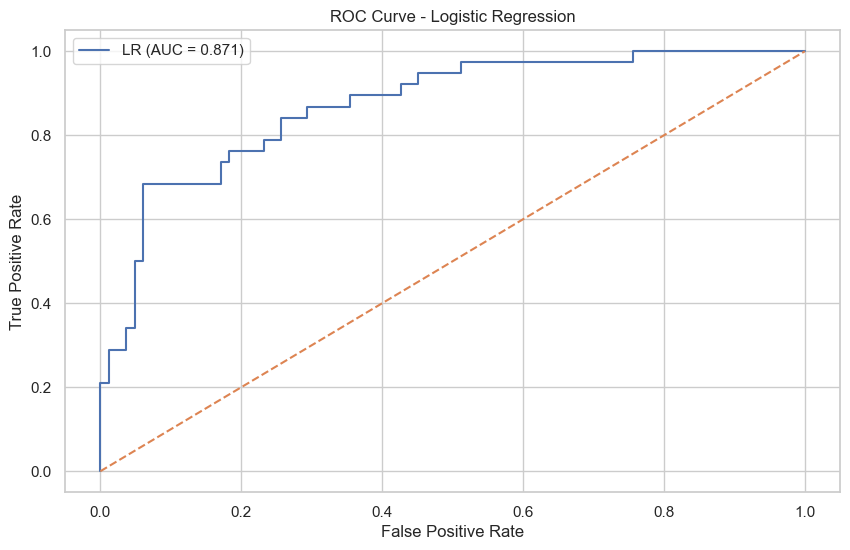

In [36]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC = {roc_lr:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

_RANDOM FOREST_

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
)

rf.fit(X_train, y_train)

# Prediction
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# Evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

print("=== Random Forest ===")
print("Accuracy:", acc_rf)
print("ROC-AUC:", roc_rf)
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
Accuracy: 0.9416666666666667
ROC-AUC: 0.9603658536585367
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        82
           1       0.94      0.87      0.90        38

    accuracy                           0.94       120
   macro avg       0.94      0.92      0.93       120
weighted avg       0.94      0.94      0.94       120



                Feature  Importance
12       Injury_History    0.187404
17  History_x_Intensity    0.179251
14   Training_Intensity    0.133161
16       Recovery_Index    0.104214
10     Muscle_Asymmetry    0.094966
8           Sleep_Hours    0.094028
2             Height_cm    0.023541
4                   BMI    0.023288
15        Training_Load    0.022755
3             Weight_kg    0.021900
9     Flexibility_Score    0.021167
6     Training_Duration    0.020935
0                   Age    0.018703
7           Warmup_Time    0.017106
11        Recovery_Time    0.015589
13         Stress_Level    0.011913
5    Training_Frequency    0.008109
1                Gender    0.001971


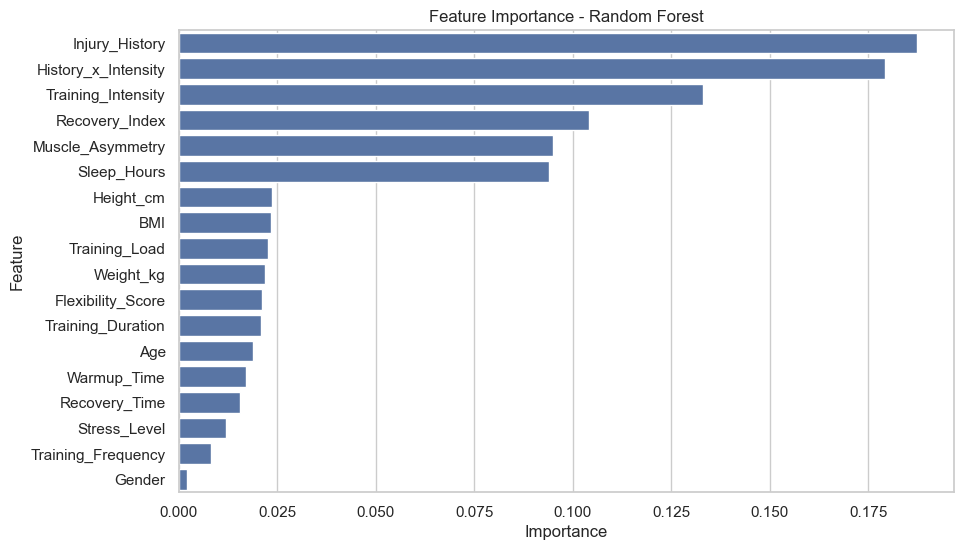

In [38]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

plt.figure()
sns.barplot(data=feature_importance, x="Importance", y="Feature")
plt.title("Feature Importance - Random Forest")
plt.show()

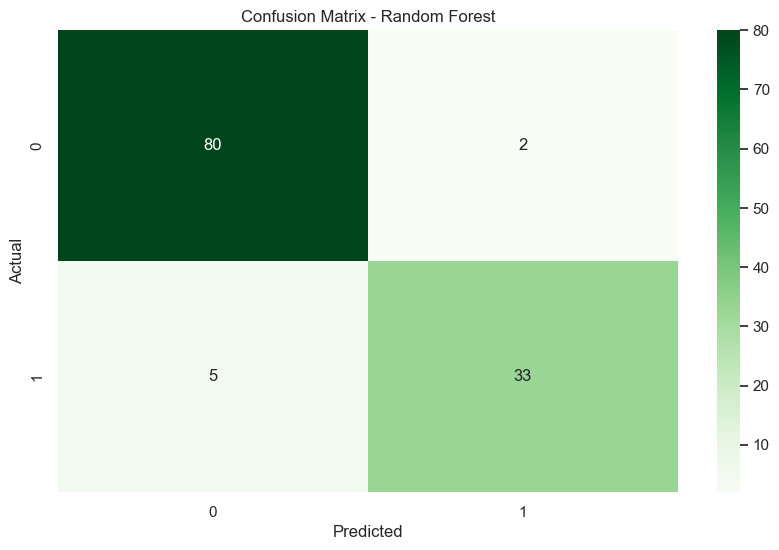

In [39]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

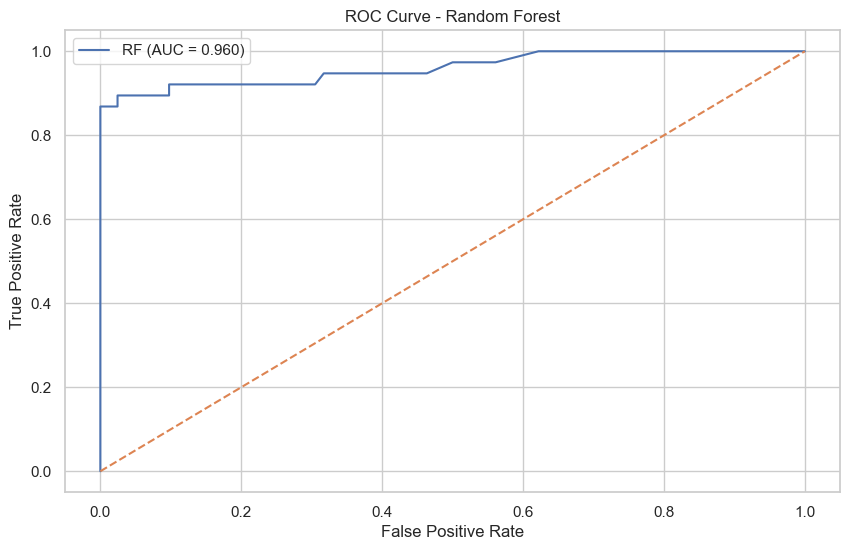

In [40]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC = {roc_rf:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

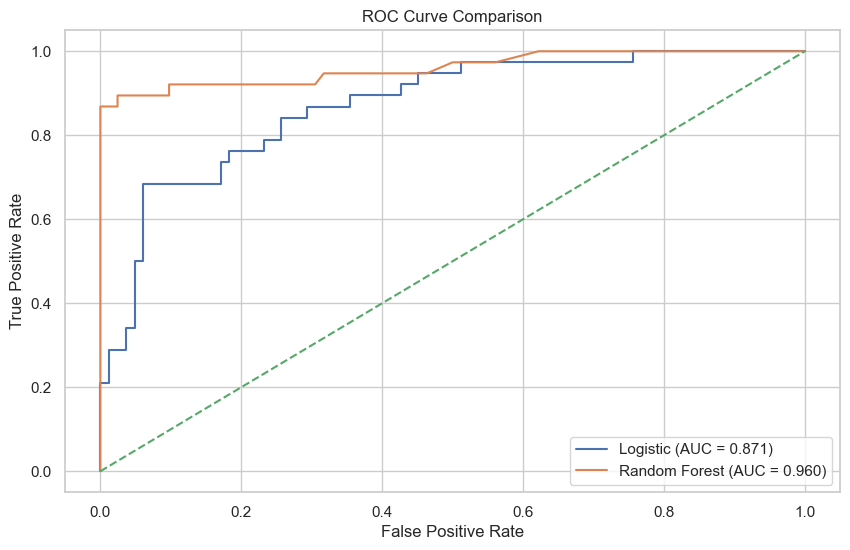

In [41]:
plt.figure()

plt.plot(fpr_lr, tpr_lr, label=f"Logistic (AUC = {roc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_rf:.3f})")
plt.plot([0,1],[0,1],'--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Hasil
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC-AUC: 0.9693885505175828


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  
    'max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)

Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best ROC-AUC: 0.8782627766498734


c:\Users\USER\Downloads\Injury-Risk-Prediction-main\Injury-Risk-Prediction-main\env\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
